# Stack Overflow 2023 Developer Survey

https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2023-developers-survey

Stack Overflow is a widely used online platform that serves as a question and answer community for around 100 million programmers and developers.

We will examine the datasets from Stack Overflow’s 2023 Developer Survey. The dataset was collected from May 8, 2023 to May 19, 2023 and the median time spent on the survey for qualified responses was 17 minutes.

90,000 Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, meta.stackoverflow posts, banner ads, and social media posts. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import random
import os
import statsmodels.api as sm
from scipy import stats
import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
survey = pd.read_csv('/content/drive/Shareddrives/DSO 545 Big Team/survey_results_public.csv')

Mounted at /content/drive


NameError: ignored

## 1. Introduce the dataset

In [ ]:
survey.head()

ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   
3           4  I agree  I am a developer by profession  25-34 years old   
4           5  I agree  I am a developer by profession  25-34 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   

                                    CodingActivities  \
0                                                NaN   
1  Hobby;Contribute to open-source projects;Boots...   
2  Hobby;Professional development or self-paced l...   
3                                              Hobby   
4  Hobby;Contribute to open-source projects;Profe...   

                                        EdLevel  \
0                                           NaN   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
1  Books / Physical media;Colleague;Friend or fam...   
2  Books / Physical media;Colleague;On the job tr...   
3  Colleague;Friend or family member;Other online...   
4  Books / Physical media;Online Courses or Certi...   

                                     LearnCodeOnline  ...        Frequency_1  \
0                                                NaN  ...                NaN   
1  Formal documentation provided by the owner of ...  ...   1-2 times a week   
2  Formal documentation provided by the owner of ...  ...  6-10 times a week   
3  Formal documentation provided by the owner of ...  ...   1-2 times a week   
4  Formal documentation provided by the owner of ...  ...   1-2 times a week   

         Frequency_2       Frequency_3         TimeSearching  \
0                NaN               NaN                   NaN   
1   10+ times a week             Never   15-30 minutes a day   
2  6-10 times a week  3-5 times a week   30-60 minutes a day   
3   10+ times a week  1-2 times a week   15-30 minutes a day   
4   1-2 times a week  3-5 times a week  60-120 minutes a day   

         TimeAnswering                                   ProfessionalTech  \
0                  NaN                                                NaN   
1  15-30 minutes a day  DevOps function;Microservices;Automated testin...   
2  30-60 minutes a day  DevOps function;Microservices;Automated testin...   
3  30-60 minutes a day  Automated testing;Continuous integration (CI) ...   
4  30-60 minutes a day  Microservices;Automated testing;Observability ...   

                                            Industry           SurveyLength  \
0                                                NaN                    NaN   
1  Information Services, IT, Software Development...  Appropriate in length   
2  Information Services, IT, Software Development...  Appropriate in length   
3                                                NaN  Appropriate in length   
4                                              Other  Appropriate in length   

                   SurveyEase ConvertedCompYearly  
0                         NaN                 NaN  
1                        Easy            285000.0  
2              

In [ ]:
survey.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

## 2. Understanding the Dataset
- Nature of the data (categorical or numerical, validity issue)
- Extent of missing values

<Axes: >

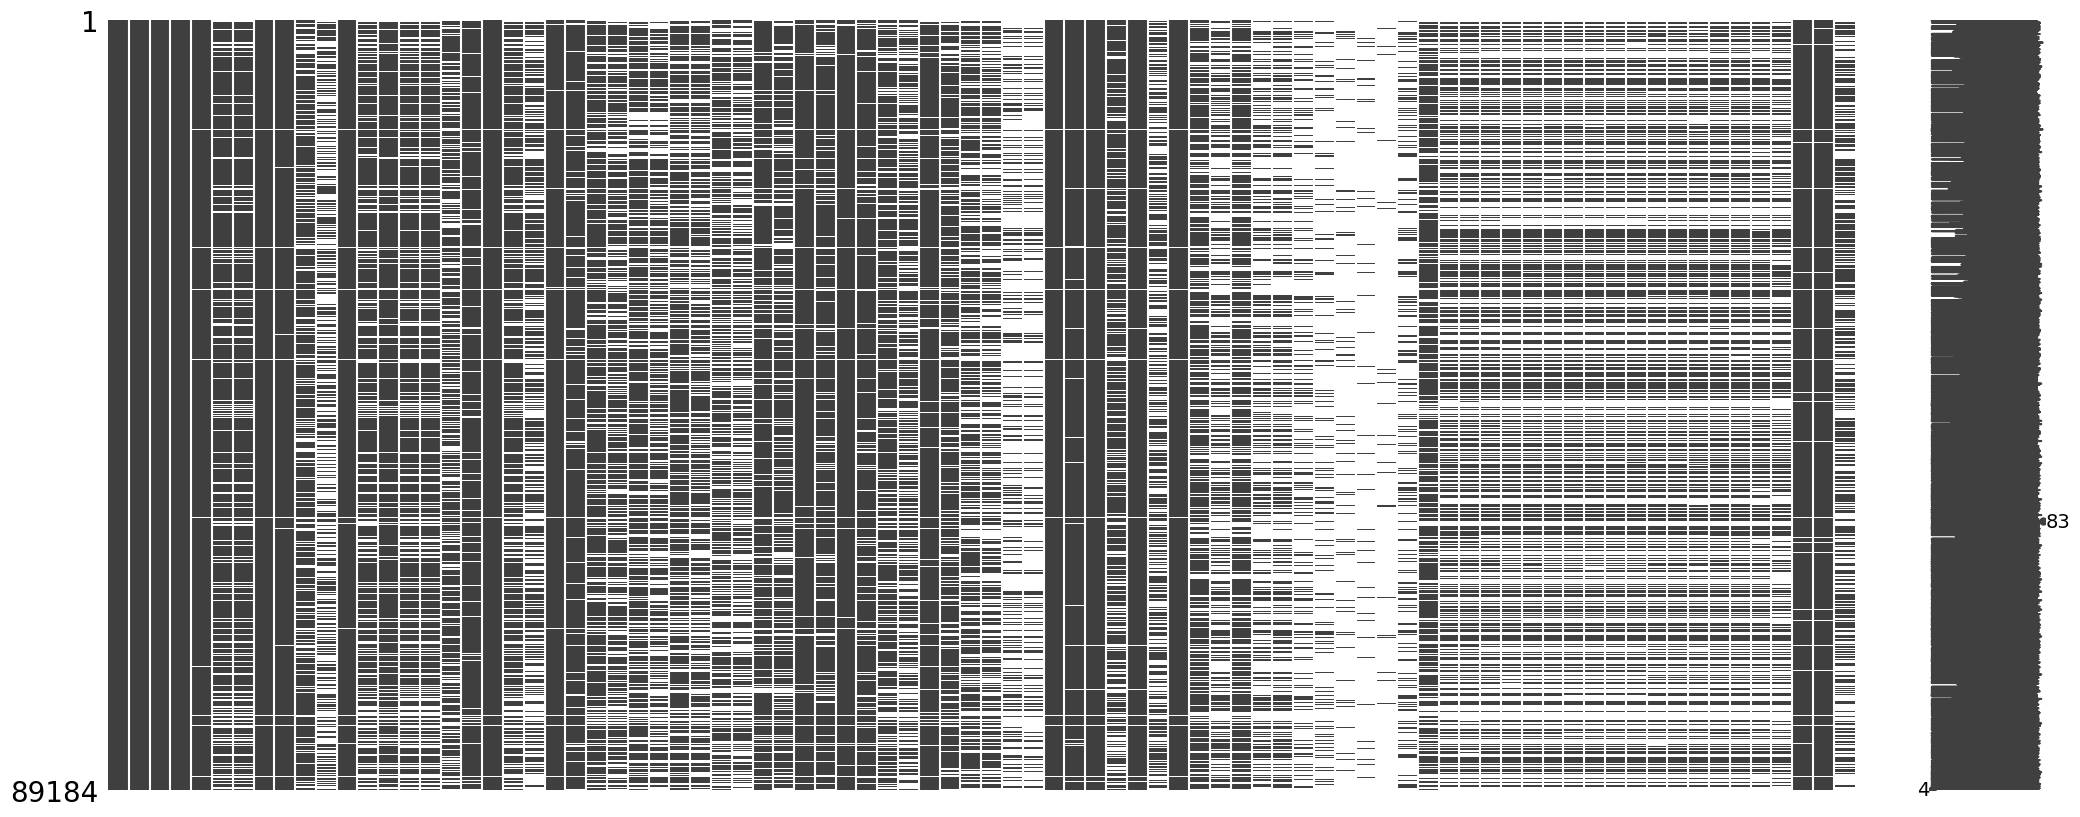

In [ ]:
msno.matrix(survey)

<Axes: >

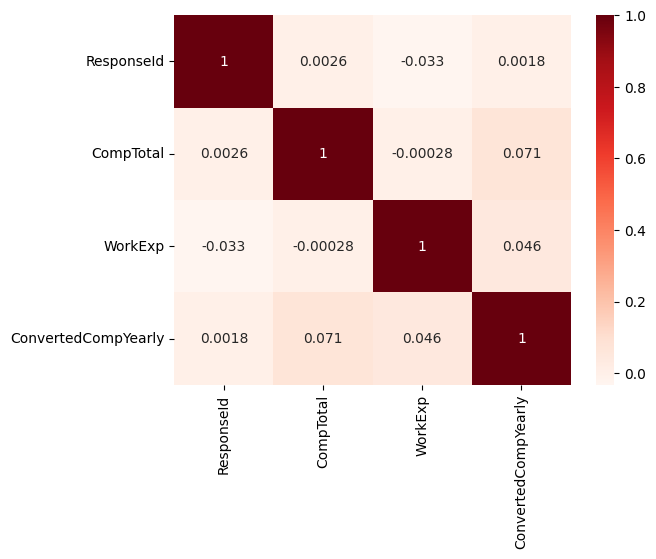

In [ ]:
survey=survey.corr(numeric_only=True)
sns.heatmap(survey,annot=True,cmap='Reds')

## 3. Key Business Question
1) “What is the salary difference between individuals who use AI tools and those who don't? For the group that tends to not use AI tools, could Age be a factor influencing their salaries?"

2) “What are the most popular programming languages/platform/database for the highest earning salary?”

3) “What is the primary learning source for developers? Does the number of sources affect the salary? How do the learning source preferences change as developers gain experience?”

4) "These days, companies are adopting various work arrangements. Do people receive higher pay when working remotely, or in-person, or in a hybrid model?"

5) “For professional developers, do small companies pay them more than the big ones? For those small companies, what is the average age and their salary?”

## 4. Variable(Column) Selection

In [ ]:
import pandas as pd

survey = pd.read_csv('/content/drive/Shareddrives/DSO 545 Big Team/survey_results_public.csv')

selected_columns=['Age','Employment','RemoteWork','CodingActivities','EdLevel',
                 'LearnCode','YearsCode','DevType','OrgSize','Country',
                 'LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith',
                 'ConvertedCompYearly','Industry', "AISent", "AIBen","AISelect"]

selected_survey=survey[selected_columns]
selected_survey.head()

Age                                         Employment  \
0  18-24 years old                                                NaN   
1  25-34 years old                                Employed, full-time   
2  45-54 years old                                Employed, full-time   
3  25-34 years old                                Employed, full-time   
4  25-34 years old  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   

                                    CodingActivities  \
0                                                NaN   
1  Hobby;Contribute to open-source projects;Boots...   
2  Hobby;Professional development or self-paced l...   
3                                              Hobby   
4  Hobby;Contribute to open-source projects;Profe...   

                                        EdLevel  \
0                                           NaN   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode YearsCode  \
0                                                NaN       NaN   
1  Books / Physical media;Colleague;Friend or fam...        18   
2  Books / Physical media;Colleague;On the job tr...        27   
3  Colleague;Friend or family member;Other online...        12   
4  Books / Physical media;Online Courses or Certi...         6   

                                DevType                   OrgSize  \
0                                   NaN                       NaN   
1  Senior Executive (C-Suite, VP, etc.)          2 to 9 employees   
2                   Developer, back-end  5,000 to 9,999 employees   
3                  Developer, front-end      100 to 499 employees   
4                 Developer, full-stack        20 to 99 employees   

                    Country  \
0                       NaN   
1  United States of America   
2  United States of America   
3  United States of America   
4               Philippines   

                              LanguageHaveWorkedWith  \
0                                                NaN   
1                         HTML/CSS;JavaScript;Python   
2                         Bash/Shell (all shells);Go   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;PH...   
4                     HTML/CSS;JavaScript;TypeScript   

                      DatabaseHaveWorkedWith  \
0                                        NaN   
1                                   Supabase   
2                                        NaN   
3                           PostgreSQL;Redis   
4  BigQuery;Elasticsearch;MongoDB;PostgreSQL   

                              PlatformHaveWorkedWith  ConvertedCompYearly  \
0                                                NaN                  NaN   
1           Amazon Web Services (AWS);Netlify;Vercel             285000.0   
2  Amazon Web Services (AWS);Google Cloud;OpenSta...             250000.0   
3                                  Cloudflare;Heroku             156000.0   
4  Amazon Web Services (AWS);Firebase;Heroku;Netl...              23456.0   

                                            Industry          AISent  \
0                                                NaN             NaN   
1  Information Services, IT, Software Development...     Indifferent   
2  Information Services, IT, Software Development...             NaN   
3                                                NaN             NaN   
4                                              Other  Very favorable   

               AIBen                 AISelect  
0                NaN                      NaN  
1  Somewhat distrust                      Yes  
2       

##5. Data Cleaning


### 1) Variable: 'ConvertedCompYearly'
Ensuring the integrity of the 'Salary(ConvertedCompYearly)' variable, is paramount as it serves as a standard in our analysis. We need to conduct a thorough examination, encompassing data types, the presence of NaN values, and the identification of potential outliers.

###1.1) Nature of the data

In [ ]:
selected_survey['ConvertedCompYearly'].dtype

dtype('float64')

###1.2) Extent of the missing values

In [ ]:
salary_NaN=selected_survey['ConvertedCompYearly'].isna().sum()
salary_NaN

print(f"Number of NaN values in 'ConvertedCompYearly': {salary_NaN}")

Number of NaN values in 'ConvertedCompYearly': 41165


In [ ]:
total_Salary=len(selected_survey['ConvertedCompYearly'])
total_Salary

print(f"Number of total values in 'ConvertedCompYearly': {total_Salary}")

Number of total values in 'ConvertedCompYearly': 89184


In [ ]:
per_Salary_NaN=salary_NaN/total_Salary*100
per_Salary_NaN

print(f"Percentage of NaN values in 'ConvertedCompYearly': {round(per_Salary_NaN,2)}%")

Percentage of NaN values in 'ConvertedCompYearly': 46.16%


In [ ]:
selected_survey.dropna(subset=['ConvertedCompYearly'],inplace=True)

<ipython-input-43-50b32f28910a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
selected_survey_NaN=selected_survey['ConvertedCompYearly'].isna().sum()
selected_survey_NaN

print(f"Check the number of NaN values after dropping: {selected_survey_NaN}")

Check the number of NaN values after dropping: 0


###1.3) Data cleaning & redefining

1. Remove outliers
2. Redefine the outliers
3. Basic constraints:
- Country: United States
- DevType: Developer_full-stack, back-end, front-end, mobile, desktop or enterprise applications, embedded applications or devices, game or graphics, QA or test, Developer Advocate, Developer Experience
- Employment: Full-time

4. Remove the rest of NaN values

In [ ]:
selected_survey['ConvertedCompYearly'].describe()

count    4.801900e+04
mean     1.031101e+05
std      6.814188e+05
min      1.000000e+00
25%      4.390700e+04
50%      7.496300e+04
75%      1.216410e+05
max      7.435143e+07
Name: ConvertedCompYearly, dtype: float64

In [ ]:
selected_survey['ConvertedCompYearly'].sort_values(ascending=False)

53268    74351432.0
77848    73607918.0
66223    72714292.0
28121    57513831.0
19679    36573181.0
            ...    
47423           1.0
55664           1.0
37314           1.0
52429           1.0
37160           1.0
Name: ConvertedCompYearly, Length: 48019, dtype: float64

In [ ]:
#Remove Outliers
Q1=selected_survey['ConvertedCompYearly'].quantile(0.25)
Q3=selected_survey['ConvertedCompYearly'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

#Basic Constraints
final_survey=selected_survey[(selected_survey['ConvertedCompYearly']>=lower) &
 (selected_survey['ConvertedCompYearly']<=upper) &
  (selected_survey['Employment']=='Employed, full-time') &
  (selected_survey['Country'] =='United States of America') &
  (selected_survey['DevType'].str.contains('Developer'))]

#Minimum wage: federal minimum wage multiplied by the number of working hours in a fiscal year
minWage=7.25*2080
final_survey['ConvertedCompYearly']=np.where(final_survey['ConvertedCompYearly']<=minWage,minWage,final_survey['ConvertedCompYearly'])
final_survey = final_survey[final_survey['ConvertedCompYearly']>= minWage]

#Remove the rest of NaN values
final_survey=final_survey.dropna()

<ipython-input-47-a719e956746a>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



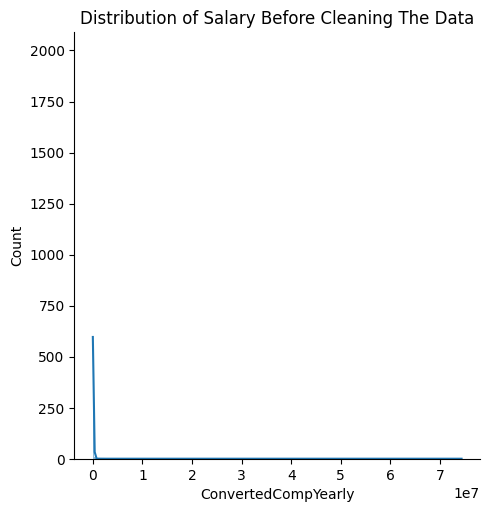

<Figure size 60000x60000 with 0 Axes>

In [ ]:
sns.displot(data=survey, x='ConvertedCompYearly', kde=True)
plt.title('Distribution of Salary Before Cleaning The Data')
plt.figure(figsize=(600, 600))
plt.show()

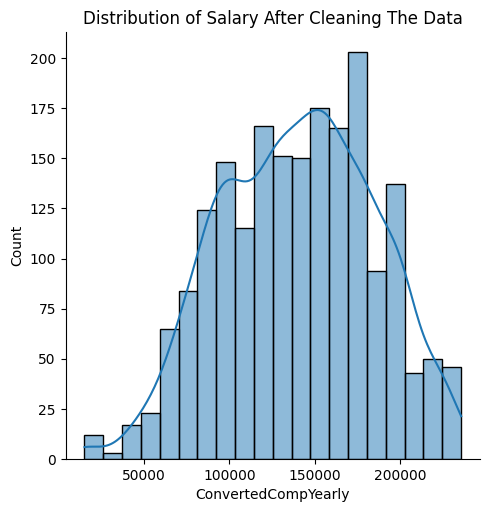

<Figure size 60000x60000 with 0 Axes>

In [ ]:
sns.displot(data=final_survey, x='ConvertedCompYearly', kde=True)
plt.title('Distribution of Salary After Cleaning The Data')
plt.figure(figsize=(600, 600))
plt.show()

In [ ]:
fig = px.box(survey,y='ConvertedCompYearly',points='all',title='Distribution of Salary Before Cleaning The Data')
fig.update_layout(width=600, height=600)
fig.show()

In [ ]:
fig = px.box(final_survey,y='ConvertedCompYearly',points='all',title='Distribution of Salary After Cleaning The Data')
fig.update_layout(width=600, height=600)
fig.show()

### 1.4) Create a new column 'logComp' for applying 'numpy.log()' function to 'ConvertedCompYearly' to deal with variataions

In [ ]:
final_survey['logComp'] = np.log(final_survey['ConvertedCompYearly'])
final_survey.head()

Age           Employment  \
6    35-44 years old  Employed, full-time   
7    25-34 years old  Employed, full-time   
36   55-64 years old  Employed, full-time   
239  25-34 years old  Employed, full-time   
526  25-34 years old  Employed, full-time   

                               RemoteWork  \
6                                  Remote   
7                                  Remote   
36   Hybrid (some remote, some in-person)   
239                                Remote   
526  Hybrid (some remote, some in-person)   

                                      CodingActivities  \
6    Hobby;Contribute to open-source projects;Profe...   
7                                                Hobby   
36   Bootstrapping a business;Professional developm...   
239  Hobby;Professional development or self-paced l...   
526                       I don’t code outside of work   

                                               EdLevel  \
6    Some college/university study without earning ...   
7         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
36   Some college/university study without earning ...   
239       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
526       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                             LearnCode YearsCode  \
6    Friend or family member;Online Courses or Cert...         4   
7    Books / Physical media;Online Courses or Certi...         5   
36   Books / Physical media;Online Courses or Certi...        33   
239  Books / Physical media;Colleague;Friend or fam...        11   
526  Hackathons (virtual or in-person);On the job t...        17   

                   DevType                   OrgSize  \
6    Developer, full-stack  1,000 to 4,999 employees   
7    Developer, full-stack        10 to 19 employees   
36   Developer, full-stack      100 to 499 employees   
239  Developer, full-stack        10 to 19 employees   
526  Developer, full-stack      100 to 499 employees   

                      Country  \
6    United States of America   
7    United States of America   
36   United States of America   
239  United States of America   
526  United States of America   

                                LanguageHaveWorkedWith  \
6    Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...   
7    Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript   
36               C#;HTML/CSS;JavaScript;SQL;TypeScript   
239                Apex;HTML/CSS;JavaScript;Python;SQL   
526                     HTML/CSS;JavaScript;TypeScript   

                                DatabaseHaveWorkedWith  \
6    MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...   
7                  Dynamodb;MongoDB;MySQL;Redis;SQLite   
36           Elasticsearch;Microsoft SQL Server;SQLite   
239                                  PostgreSQL;SQLite   
526                             Dynamodb;Elasticsearch   

                              PlatformHaveWorkedWith  ConvertedCompYearly  \
6            Amazon Web Services (AWS);Digital Ocean             135000.0   
7    Amazon Web Services (AWS);Fly.io;Netlify;Vercel              80000.0   
36                                   Microsoft Azure             130000.0   
239                        Amazon Web Services (AWS)             120000.0   
526                        Amazon Web Services (AWS)             215000.0   

                                              Industry       AISent  \
6    Information Services, IT, Software Development...  Unfavorable   
7                                   Financial Services    Favorable   
36      Manufacturing, Transportation, or Supply Chain    Favorable   
239  Information Services, IT, Software Development...    Favorable   
526  Information Services, IT, Software Development...  Indifferent   

                 AIBen                AISelect    logComp  
6    Somewhat distrust                     Yes  11.813030  
7    Somewhat distrust                     Yes  11.289782  
36      Somewhat trust                     Yes  11.775290  
239 

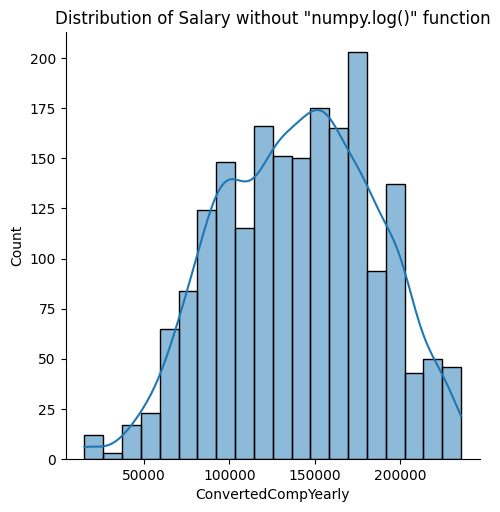

<Figure size 60000x60000 with 0 Axes>

In [ ]:
sns.displot(data=final_survey,x='ConvertedCompYearly',kde=True)
plt.title('Distribution of Salary without "numpy.log()" function')
plt.figure(figsize=(600, 600))
plt.show()

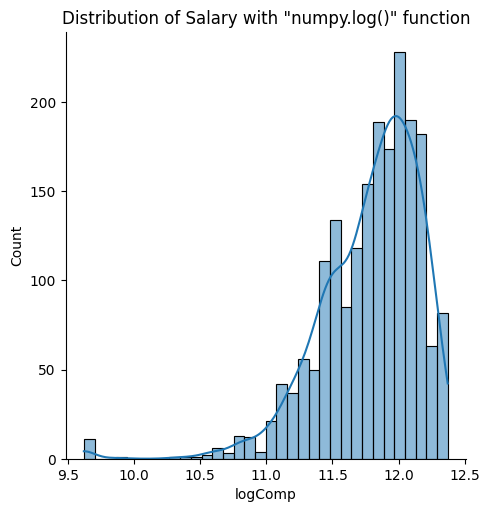

<Figure size 60000x60000 with 0 Axes>

In [ ]:
sns.displot(data=final_survey,x='logComp',kde=True)
plt.title('Distribution of Salary with "numpy.log()" function')
plt.figure(figsize=(600, 600))
plt.show()

In [ ]:
fig = px.box(final_survey,y='ConvertedCompYearly',points='all',title='Distribution of Salary without "numpy.log()" function')
fig.update_layout(width=600, height=600)
fig.show()

In [ ]:
fig = px.box(final_survey,y='logComp',points='all',title='Distribution of Salary with "numpy.log()" function')
fig.update_layout(width=600, height=600)
fig.show()

## 6. Key Business Question


## 1. For developers selecting AI, does using AI which produces greater productivity help with a higher salary, or other factors revealed other potential patterns?

## Step 1: General statistics visualizations

Pie chart showing the porportion of developers using AI

In [ ]:
AISelect_per_US = (final_survey.groupby('AISelect').size()/final_survey.shape[0])*100

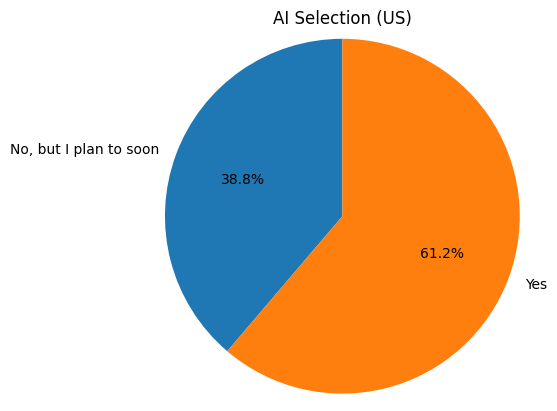

In [ ]:
plt.pie(AISelect_per_US,labels=AISelect_per_US.index, radius=1.2,autopct='%.1f%%', startangle=90)
plt.title('AI Selection (US)')
plt.show()

Box chart comparsion with the two remaining categorical values

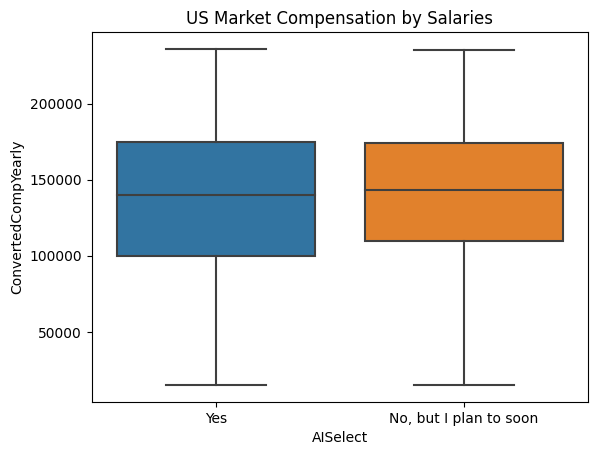

In [ ]:
sns.boxplot(x=final_survey['AISelect'],y=final_survey['ConvertedCompYearly'])
plt.title('US Market Compensation by Salaries')
plt.show()

In [ ]:
df_sorted_Pre = final_survey[['ConvertedCompYearly','AISent','AIBen','AISelect']]

Desciptive Analysis for different AI Selection

In [ ]:
df_sorted_Pre[df_sorted_Pre['AISelect']=='Yes'].describe() #Yes

ConvertedCompYearly
count          1207.000000
mean         138993.434963
std           45949.543285
min           15080.000000
25%          100000.000000
50%          140000.000000
75%          175000.000000
max          236000.000000

In [ ]:
df_sorted_Pre[df_sorted_Pre['AISelect']=='No, but I plan to soon'].describe() #No, but I plan to soon

ConvertedCompYearly
count           764.000000
mean         141846.191099
std           42928.095322
min           15080.000000
25%          110000.000000
50%          143000.000000
75%          174250.000000
max          235000.000000

## Step 2: Name and Specifiy Dataset

df_analysis1 being the developers selecting "YES" and df_analysis being the developes selecting "No, but I plan to soon"

In [ ]:
df_sorted_Pre = final_survey[['ConvertedCompYearly','AISent','AIBen','AISelect']]
df_sorted = final_survey[['ConvertedCompYearly','AISent','AIBen','AISelect']].dropna()
df_analysis1 = df_sorted[df_sorted['AISelect']=='Yes']
df_analysis2 = df_sorted[(df_sorted['AISelect']=="No, but I plan to soon")]

In [ ]:
df_analysis1.shape[0]
df_analysis1

ConvertedCompYearly          AISent                       AIBen  \
6                 135000.0     Unfavorable           Somewhat distrust   
7                  80000.0       Favorable           Somewhat distrust   
36                130000.0       Favorable              Somewhat trust   
642               126000.0  Very favorable              Somewhat trust   
669               200000.0       Favorable             Highly distrust   
...                    ...             ...                         ...   
89031             115000.0       Favorable  Neither trust nor distrust   
89061             210000.0  Very favorable           Somewhat distrust   
89112             187000.0     Indifferent              Somewhat trust   
89113             200000.0       Favorable           Somewhat distrust   
89143              90000.0       Favorable              Somewhat trust   

      AISelect  
6          Yes  
7          Yes  
36         Yes  
642        Yes  
669        Yes  
...        ...  
89031      Yes  
89061      Yes  
89112      Yes  
89113      Yes  
89143      Yes  

[1207 rows x 4 columns]

In [ ]:
df_analysis2.shape[0]
df_analysis2

ConvertedCompYearly          AISent                       AIBen  \
239               120000.0       Favorable           Somewhat distrust   
526               215000.0     Indifferent           Somewhat distrust   
1316              120000.0       Favorable  Neither trust nor distrust   
1322              139000.0  Very favorable           Somewhat distrust   
1378              185000.0          Unsure           Somewhat distrust   
...                    ...             ...                         ...   
88358             140000.0       Favorable           Somewhat distrust   
88492              65000.0  Very favorable           Somewhat distrust   
88780              57500.0       Favorable           Somewhat distrust   
88878             159000.0  Very favorable              Somewhat trust   
89030             140000.0       Favorable  Neither trust nor distrust   

                     AISelect  
239    No, but I plan to soon  
526    No, but I plan to soon  
1316   No, but I plan to soon  
1322   No, but I plan to soon  
1378   No, but I plan to soon  
...                       ...  
88358  No, but I plan to soon  
88492  No, but I plan to soon  
88780  No, but I plan to soon  
88878  No, but I plan to soon  
89030  No, but I plan to soon  

[764 rows x 4 columns]

Pre-adjusting stage of simplification: group by YES & how useful developers feel AI is



In [ ]:
df_analysis1.groupby('AISent').size()

AISent
Favorable           578
Indifferent         161
Unfavorable          26
Unsure               22
Very favorable      414
Very unfavorable      6
dtype: int64

Function for adjusting 'AISent'

In [ ]:
df_analysis1a = df_analysis1[df_analysis1['AISent']!='Unsure']
def recategorize1(value):
    if value in ['Very favorable', 'Favorable']:
        return 'Favorable'
    elif value in ['Unfavorable', 'Very unfavorable']:
        return 'Unfavorable'
    else:
        return value

df_analysis1a['AISent'] = df_analysis1a['AISent'].apply(recategorize1)


<ipython-input-67-45414b1fed0f>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pre-adjusting stage of simplification: group by YES selector & trustfulness

In [ ]:
df_analysis1.groupby('AIBen').size()

AIBen
Highly distrust                72
Highly trust                   24
Neither trust nor distrust    301
Somewhat distrust             311
Somewhat trust                499
dtype: int64

In [ ]:
def recategorize2(value):
    if value in ['Highly trust', 'Somewhat trust']:
        return 'Trust'
    elif value in ['Highly distrust', 'Somewhat distrust']:
        return 'Distrust'
    else:
        return value

df_analysis1a['AIBen'] = df_analysis1a['AIBen'].apply(recategorize2)

<ipython-input-69-6f41a66152b4>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_analysis1a.groupby('AIBen')['ConvertedCompYearly'].size().sort_values()

AIBen
Neither trust nor distrust    293
Distrust                      371
Trust                         521
Name: ConvertedCompYearly, dtype: int64

In [ ]:
df_analysis1a[(df_analysis1a['AIBen']=='Distrust')&(df_analysis1a['AISent']=='Favorable')].mean()

<ipython-input-71-51aa5313fcc3>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



ConvertedCompYearly    145380.851406
dtype: float64

### **Step 3: In-depth Crossover Visualizations**

**YES: AISent & AIBen crossover box chart analysis**

In [ ]:
fig_AI_Yes = px.box(df_analysis1a, x="AIBen", y="ConvertedCompYearly", points='all', color="AISent", color_discrete_sequence=['blue', 'green','orange'])
fig_AI_Yes.show()

Apply simplifying function to "No" respondants with their 'AISent' and 'AIBen' variables

In [ ]:
df_analysis2a = df_analysis2[df_analysis2['AISent']!='Unsure']
df_analysis2a['AISent'] = df_analysis2['AISent'].apply(recategorize1)
df_analysis2a['AIBen'] = df_analysis2['AIBen'].apply(recategorize2)

<ipython-input-73-ec465518fb47>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-ec465518fb47>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**No: AISent & AIBen crossover box chart analysis**

In [ ]:
fig_AI_No = px.box(df_analysis2a, x="AIBen", y="ConvertedCompYearly", points='all', color="AISent", color_discrete_sequence=['blue', 'green','orange'])
fig_AI_No.show()

**Box table: proportion visualization of "selected combinations" to total developers including YES or NO, but I plan to soon**

(0.0, 300.0, 0.0, 150.0)

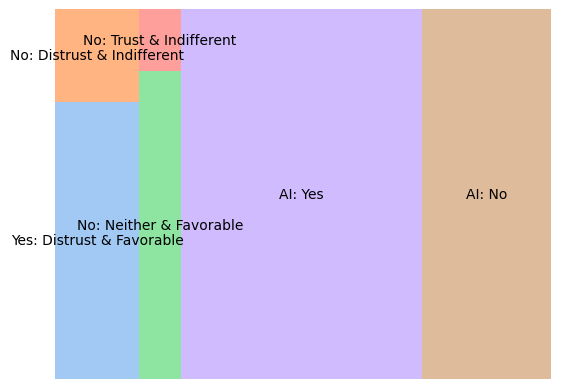

In [ ]:
YES_Distrust_Favorable = df_analysis1a[(df_analysis1a['AIBen']=='Distrust') & (df_analysis1a['AISent']=='Favorable')].shape[0]
NO_Distrust_Indifferent = df_analysis2a[(df_analysis2a['AIBen']=='Neither trust nor distrust')&(df_analysis2a['AISent']=='Indifferent')].shape[0]
NO_Neither_Favorable = df_analysis2a[(df_analysis2a['AIBen']=='Neither trust nor distrust')&(df_analysis2a['AISent']=='Favorable')].shape[0]
NO_Trust_Indifferent = df_analysis2a[(df_analysis2a['AIBen']=='Trust')&(df_analysis2a['AISent']=='Indifferent')].shape[0]

AI_YES = df_analysis1.shape[0] - YES_Distrust_Favorable
AI_NO = df_sorted_Pre[df_sorted_Pre['AISelect']!='Yes'].shape[0] - NO_Neither_Favorable  - NO_Distrust_Indifferent - NO_Trust_Indifferent

Box_AI_List = [YES_Distrust_Favorable, NO_Distrust_Indifferent, NO_Neither_Favorable, NO_Trust_Indifferent, AI_YES, AI_NO]

!pip install squarify
import squarify

Box_df = pd.Series(Box_AI_List, index=['Yes: Distrust & Favorable','No: Distrust & Indifferent','No: Neither & Favorable','No: Trust & Indifferent','AI: Yes', 'AI: No'])
squarify.plot(sizes=Box_df, label = Box_df.index, norm_x=300, norm_y=150,color=sns.color_palette('pastel',len(Box_df.index)))
plt.axis('off')

##2. “What are the most popular programming languages/platform/database for the highest earning salary?”


### Step 1: LanguagesHaveWorkedWith vs ConvertedCompYearly

In [ ]:
#pull out key LanguageHaveWorkedWith
final_survey['Python'] = [1 if 'Python' in x else 0 for x in final_survey['LanguageHaveWorkedWith']]
final_survey['HTML/CSS'] = [1 if 'HTML/CSS' in x else 0 for x in final_survey['LanguageHaveWorkedWith']]
final_survey['JavaScript'] = [1 if 'JavaScript' in x else 0 for x in final_survey['LanguageHaveWorkedWith']]
final_survey['SQL'] = [1 if 'SQL' in x else 0 for x in final_survey['LanguageHaveWorkedWith']]
final_survey['C_sharp'] = [1 if 'C#' in x else 0 for x in final_survey['LanguageHaveWorkedWith']]
final_survey['C_plus'] = [1 if 'C++' in x else 0 for x in final_survey["LanguageHaveWorkedWith"]]
final_survey['Java']=[1 if 'Java' in x else 0 for x in final_survey['LanguageHaveWorkedWith']]
final_survey['R'] = [1 if 'R' in x else 0 for x in final_survey['LanguageHaveWorkedWith']]
final_survey.head()

Age           Employment  \
6    35-44 years old  Employed, full-time   
7    25-34 years old  Employed, full-time   
36   55-64 years old  Employed, full-time   
239  25-34 years old  Employed, full-time   
526  25-34 years old  Employed, full-time   

                               RemoteWork  \
6                                  Remote   
7                                  Remote   
36   Hybrid (some remote, some in-person)   
239                                Remote   
526  Hybrid (some remote, some in-person)   

                                      CodingActivities  \
6    Hobby;Contribute to open-source projects;Profe...   
7                                                Hobby   
36   Bootstrapping a business;Professional developm...   
239  Hobby;Professional development or self-paced l...   
526                       I don’t code outside of work   

                                               EdLevel  \
6    Some college/university study without earning ...   
7         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
36   Some college/university study without earning ...   
239       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
526       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                             LearnCode YearsCode  \
6    Friend or family member;Online Courses or Cert...         4   
7    Books / Physical media;Online Courses or Certi...         5   
36   Books / Physical media;Online Courses or Certi...        33   
239  Books / Physical media;Colleague;Friend or fam...        11   
526  Hackathons (virtual or in-person);On the job t...        17   

                   DevType                   OrgSize  \
6    Developer, full-stack  1,000 to 4,999 employees   
7    Developer, full-stack        10 to 19 employees   
36   Developer, full-stack      100 to 499 employees   
239  Developer, full-stack        10 to 19 employees   
526  Developer, full-stack      100 to 499 employees   

                      Country  ...                AISelect    logComp Python  \
6    United States of America  ...                     Yes  11.813030      0   
7    United States of America  ...                     Yes  11.289782      1   
36   United States of America  ...                     Yes  11.775290      0   
239  United States of America  ...  No, but I plan to soon  11.695247      1   
526  United States of America  ...  No, but I plan to soon  12.278393      0   

     HTML/CSS JavaScript SQL C_sharp C_plus  Java  R  
6           1          1   0       0      0     1  1  
7           1          1   1       0      0     1  1  
36          1          1   1       1      0     1  0  
239         1          1   1       0      0     1  0  
526         1          1   0       0      0     1  0  

[5 rows x 27 columns]

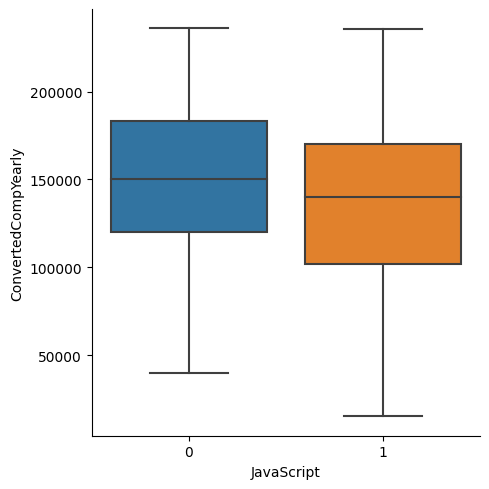

In [ ]:
#JavaScript Analysis
sns.catplot(data=final_survey,kind='box',x='JavaScript',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

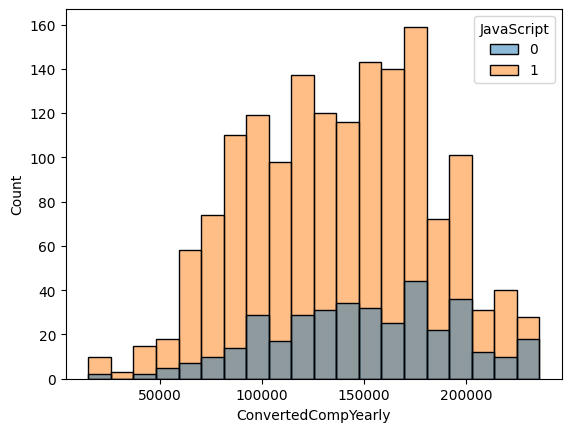

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'JavaScript')

In [ ]:
JS_summ = final_survey.groupby('JavaScript')['ConvertedCompYearly'].describe()
JS_summ

count           mean           std      min       25%       50%  \
JavaScript                                                                     
0            379.0  149593.643799  44984.835675  15080.0  120000.0  150000.0   
1           1592.0  137838.929020  44488.494780  15080.0  102000.0  140000.0   

                 75%       max  
JavaScript                      
0           183000.0  236000.0  
1           170000.0  235500.0

In [ ]:
import scipy.stats as stats
JS0 = final_survey[final_survey['JavaScript']==0]['ConvertedCompYearly']
JS1 = final_survey[final_survey['JavaScript']==1]['ConvertedCompYearly']
stats.ttest_ind(a=JS0, b=JS1,equal_var=True)

TtestResult(statistic=4.612951167772594, pvalue=4.225379990032816e-06, df=1969.0)

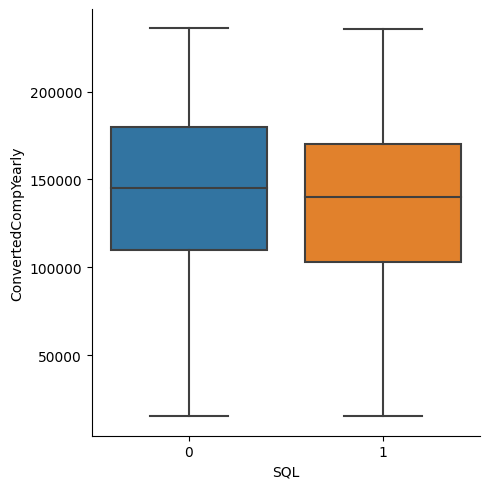

In [ ]:
#SQL Analysis
sns.catplot(data=final_survey,kind='box',x='SQL',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

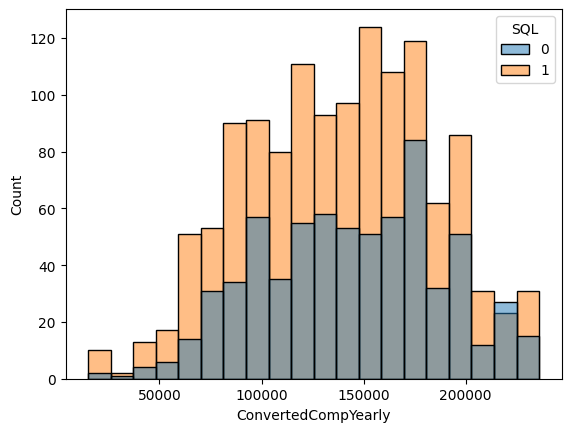

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'SQL')

In [ ]:
SQL_summ = final_survey.groupby('SQL')['ConvertedCompYearly'].describe()
SQL_summ

count           mean           std      min       25%       50%  \
SQL                                                                     
0     679.0  143851.802651  43857.082131  15080.0  110000.0  145000.0   
1    1292.0  138127.083591  45199.443004  15080.0  102750.0  140000.0   

          75%       max  
SQL                      
0    180000.0  236000.0  
1    170000.0  235500.0

In [ ]:
SQL0 = final_survey[final_survey['SQL']==0]['ConvertedCompYearly']
SQL1 = final_survey[final_survey['SQL']==1]['ConvertedCompYearly']
stats.ttest_ind(a=SQL0, b=SQL1,equal_var=True)

TtestResult(statistic=2.6993792213823986, pvalue=0.007006302794999785, df=1969.0)

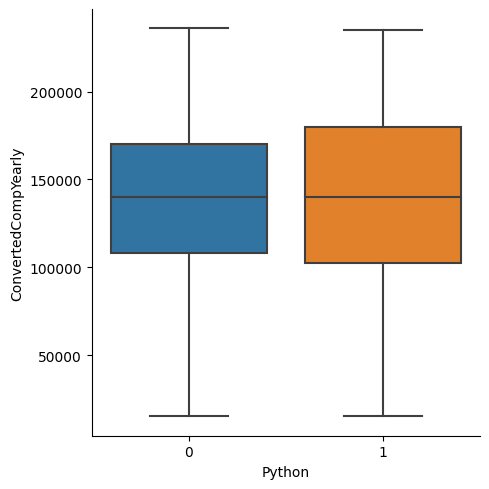

In [ ]:
#Python Analysis
sns.catplot(data=final_survey,kind='box',x='Python',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

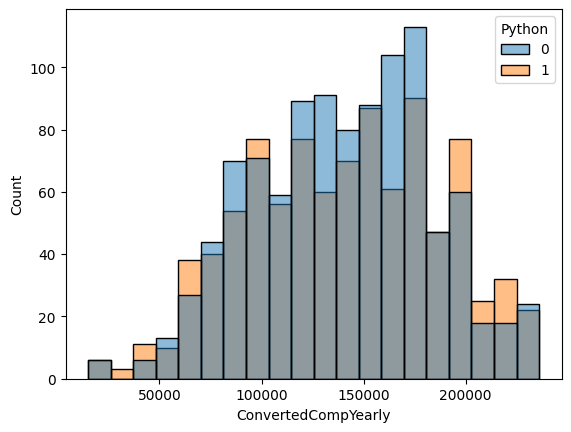

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'Python')

In [ ]:
Python_summ = final_survey.groupby('Python')['ConvertedCompYearly'].describe()
Python_summ

count           mean           std      min       25%       50%  \
Python                                                                     
0       1028.0  139764.420233  42904.770201  15080.0  108000.0  140000.0   
1        943.0  140464.201485  46825.088490  15080.0  102500.0  140000.0   

             75%       max  
Python                      
0       170000.0  236000.0  
1       180000.0  235295.0

In [ ]:
Python0 = final_survey[final_survey['Python']==0]['ConvertedCompYearly']
Python1 = final_survey[final_survey['Python']==1]['ConvertedCompYearly']
stats.ttest_ind(a=Python0, b=Python1,equal_var=True)

TtestResult(statistic=-0.3462337456680503, pvalue=0.7292040483088696, df=1969.0)

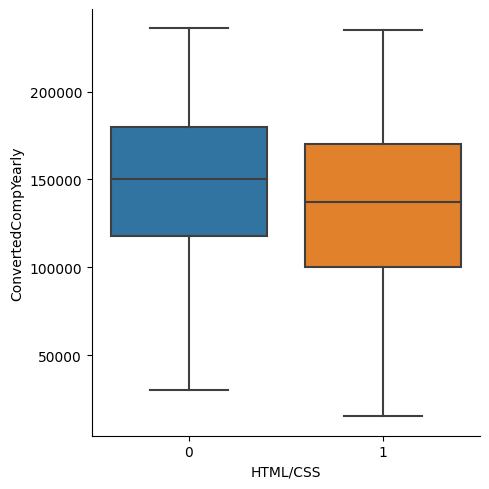

In [ ]:
#HTML/CSS
sns.catplot(data=final_survey,kind='box',x='HTML/CSS',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

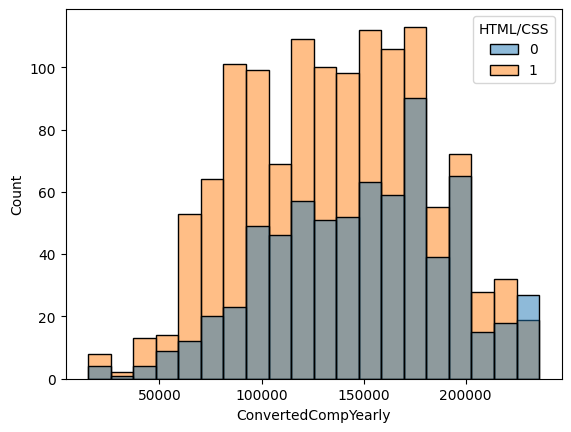

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'HTML/CSS')

In [ ]:
HTML_CSS_summ = final_survey.groupby('HTML/CSS')['ConvertedCompYearly'].describe()
HTML_CSS_summ

count           mean           std      min       25%       50%  \
HTML/CSS                                                                     
0          704.0  148061.147727  43994.262213  15080.0  118000.0  150000.0   
1         1267.0  135675.231255  44669.246830  15080.0  100000.0  137000.0   

               75%       max  
HTML/CSS                      
0         180000.0  236000.0  
1         170000.0  235000.0

In [ ]:
HTML_CSS0 = final_survey[final_survey['HTML/CSS']==0]['ConvertedCompYearly']
HTML_CSS1 = final_survey[final_survey['HTML/CSS']==1]['ConvertedCompYearly']
stats.ttest_ind(a=HTML_CSS0, b=HTML_CSS1,equal_var=True)

TtestResult(statistic=5.930464582803891, pvalue=3.5589836088014937e-09, df=1969.0)

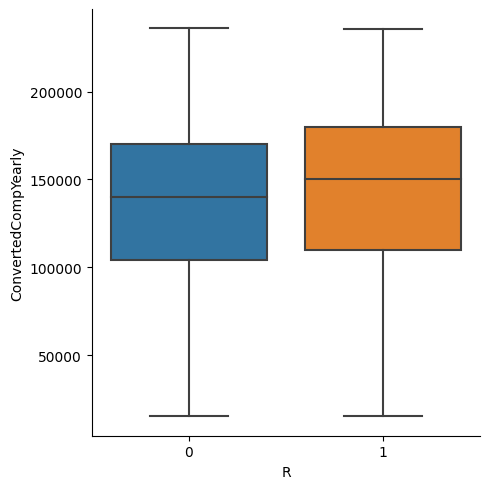

In [ ]:
#R analysis
sns.catplot(data=final_survey,kind='box',x='R',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

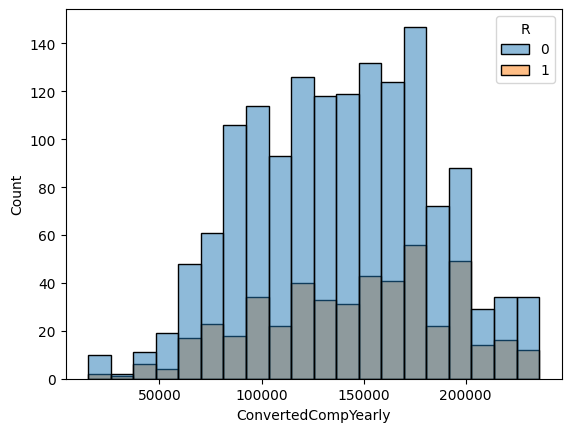

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'R')

In [ ]:
R_summ = final_survey.groupby('R')['ConvertedCompYearly'].describe()
R_summ

count           mean           std      min       25%       50%       75%  \
R                                                                               
0  1487.0  138478.465367  44211.783005  15080.0  104000.0  140000.0  170000.0   
1   484.0  145078.694215  46304.799927  15080.0  110000.0  150000.0  180000.0   

        max  
R            
0  236000.0  
1  235500.0

In [ ]:
R0 = final_survey[final_survey['R']==0]['ConvertedCompYearly']
R1 = final_survey[final_survey['R']==1]['ConvertedCompYearly']
stats.ttest_ind(a=R0, b=R1,equal_var=True)

TtestResult(statistic=-2.8193791952267953, pvalue=0.004859805803051917, df=1969.0)

In [ ]:
languages = final_survey[['C_plus', 'C_sharp', 'HTML/CSS', 'Python', 'R', 'SQL', 'Java', 'JavaScript', 'ConvertedCompYearly']]
languages.head()

C_plus  C_sharp  HTML/CSS  Python  R  SQL  Java  JavaScript  \
6         0        0         1       0  1    0     1           1   
7         0        0         1       1  1    1     1           1   
36        0        1         1       0  0    1     1           1   
239       0        0         1       1  0    1     1           1   
526       0        0         1       0  0    0     1           1   

     ConvertedCompYearly  
6               135000.0  
7                80000.0  
36              130000.0  
239             120000.0  
526             215000.0

In [ ]:
languages_1 = final_survey[[ 'Python', 'R', 'SQL','ConvertedCompYearly']]
languages_1.head()

Python  R  SQL  ConvertedCompYearly
6         0  1    0             135000.0
7         1  1    1              80000.0
36        0  0    1             130000.0
239       1  0    1             120000.0
526       0  0    0             215000.0

In [ ]:
df = pd.DataFrame(columns=['Language', 'Uses Language', 'ConvertedCompYearly'])
for name in [ 'Python', 'R', 'SQL']:
  sub = languages_1[[name, 'ConvertedCompYearly']].rename(columns={name:'Uses Language'})

  sub.insert(loc=0,column='Language',value=name)
  df = pd.concat((df,sub),axis=0)
df = df.reset_index(drop=True)
df

Language Uses Language  ConvertedCompYearly
0      Python             0             135000.0
1      Python             1              80000.0
2      Python             0             130000.0
3      Python             1             120000.0
4      Python             0             215000.0
...       ...           ...                  ...
5908      SQL             0             115000.0
5909      SQL             1             210000.0
5910      SQL             0             187000.0
5911      SQL             1             200000.0
5912      SQL             1              90000.0

[5913 rows x 3 columns]

In [ ]:
import plotly.express as px
fig = px.box(df, x='Language', y='ConvertedCompYearly', color='Uses Language')
fig.show()


<Axes: >

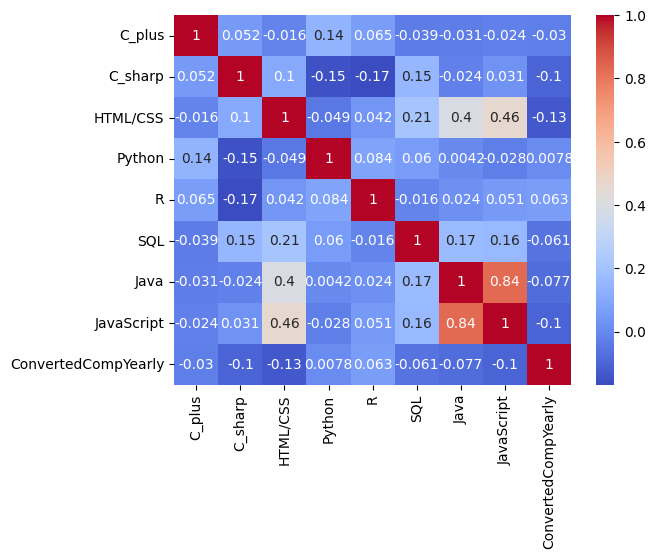

In [ ]:
#Correlation: heatmap
sns.heatmap(languages.corr(), annot = True, cmap = 'coolwarm')

In [ ]:
#pull out key DatabaseHaveWorkedWith
final_survey['MySQL'] = [1 if 'MySQL' in x else 0 for x in final_survey['DatabaseHaveWorkedWith']]
final_survey['PostgreSQL'] = [1 if 'PostgreSQL' in x else 0 for x in final_survey['DatabaseHaveWorkedWith']]
final_survey['BigQuery'] = [1 if 'BigQuery' in x else 0 for x in final_survey['DatabaseHaveWorkedWith']]
final_survey['Microsoft SQL Server'] = [1 if 'Microsoft SQL Server' in x else 0 for x in final_survey['DatabaseHaveWorkedWith']]
final_survey.head()

Age           Employment  \
6    35-44 years old  Employed, full-time   
7    25-34 years old  Employed, full-time   
36   55-64 years old  Employed, full-time   
239  25-34 years old  Employed, full-time   
526  25-34 years old  Employed, full-time   

                               RemoteWork  \
6                                  Remote   
7                                  Remote   
36   Hybrid (some remote, some in-person)   
239                                Remote   
526  Hybrid (some remote, some in-person)   

                                      CodingActivities  \
6    Hobby;Contribute to open-source projects;Profe...   
7                                                Hobby   
36   Bootstrapping a business;Professional developm...   
239  Hobby;Professional development or self-paced l...   
526                       I don’t code outside of work   

                                               EdLevel  \
6    Some college/university study without earning ...   
7         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
36   Some college/university study without earning ...   
239       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
526       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                             LearnCode YearsCode  \
6    Friend or family member;Online Courses or Cert...         4   
7    Books / Physical media;Online Courses or Certi...         5   
36   Books / Physical media;Online Courses or Certi...        33   
239  Books / Physical media;Colleague;Friend or fam...        11   
526  Hackathons (virtual or in-person);On the job t...        17   

                   DevType                   OrgSize  \
6    Developer, full-stack  1,000 to 4,999 employees   
7    Developer, full-stack        10 to 19 employees   
36   Developer, full-stack      100 to 499 employees   
239  Developer, full-stack        10 to 19 employees   
526  Developer, full-stack      100 to 499 employees   

                      Country  ... JavaScript SQL C_sharp  C_plus Java  R  \
6    United States of America  ...          1   0       0       0    1  1   
7    United States of America  ...          1   1       0       0    1  1   
36   United States of America  ...          1   1       1       0    1  0   
239  United States of America  ...          1   1       0       0    1  0   
526  United States of America  ...          1   0       0       0    1  0   

    MySQL PostgreSQL  BigQuery  Microsoft SQL Server  
6       1          1         0                     1  
7       1          0         0                     0  
36      0          0         0                     1  
239     0          1         0                     0  
526     0          0         0                     0  

[5 rows x 31 columns]

### Step 2: DatabaseHaveWorkedWith vs ConvertedCompYealry

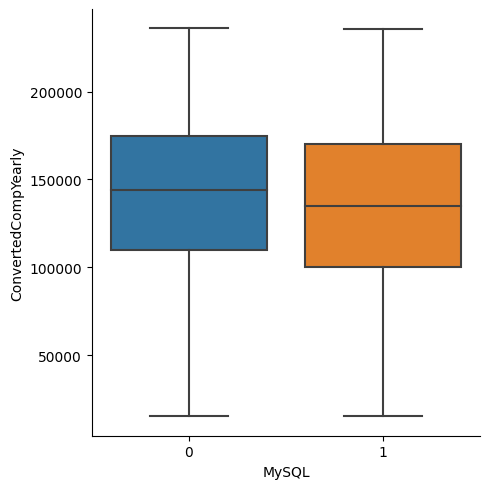

In [ ]:
#MySQL
sns.catplot(data=final_survey,kind='box',x='MySQL',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

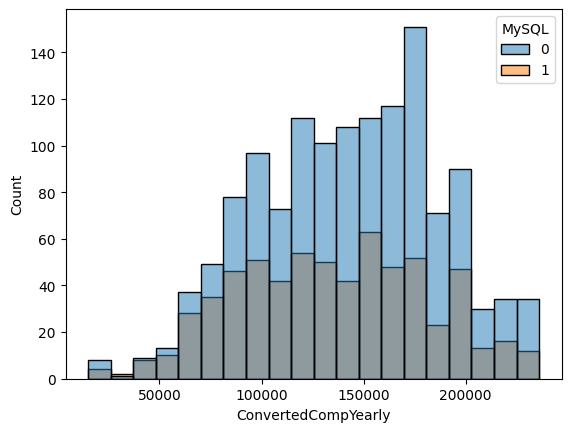

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'MySQL')

In [ ]:
MySQL_summ = final_survey.groupby('MySQL')['ConvertedCompYearly'].describe()
MySQL_summ

count           mean           std      min       25%       50%  \
MySQL                                                                     
0      1325.0  142488.335094  44079.941774  15080.0  110000.0  144000.0   
1       646.0  135198.950464  45927.467211  15080.0  100000.0  135000.0   

            75%       max  
MySQL                      
0      175000.0  236000.0  
1      170000.0  235500.0

In [ ]:
MySQL0= final_survey[final_survey['MySQL']==0]['ConvertedCompYearly']
MySQL1 = final_survey[final_survey['MySQL']==1]['ConvertedCompYearly']
stats.ttest_ind(a=MySQL0, b=MySQL1,equal_var=True)

TtestResult(statistic=3.398809228715063, pvalue=0.0006902843166435052, df=1969.0)

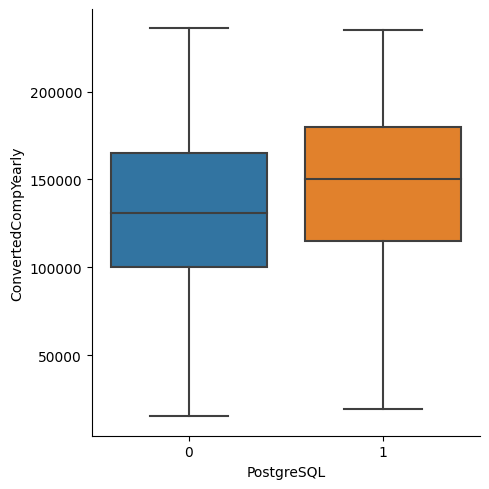

In [ ]:
#PostgreSQL
sns.catplot(data=final_survey,kind='box',x='PostgreSQL',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

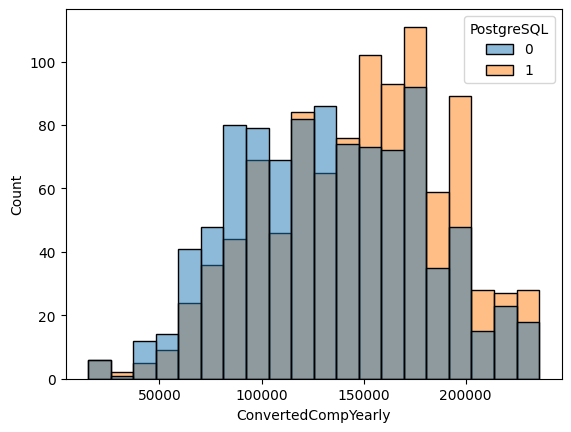

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'PostgreSQL')

In [ ]:
PostgreSQL_summ = final_survey.groupby('PostgreSQL')['ConvertedCompYearly'].describe()
PostgreSQL_summ

count           mean           std      min       25%       50%  \
PostgreSQL                                                                     
0            968.0  133283.402893  44731.569334  15080.0  100000.0  131000.0   
1           1003.0  146677.200399  43921.194252  15080.0  115000.0  150000.0   

                 75%       max  
PostgreSQL                      
0           165000.0  236000.0  
1           180000.0  235000.0

In [ ]:
PostgreSQL0= final_survey[final_survey['PostgreSQL']==0]['ConvertedCompYearly']
PostgreSQL1 = final_survey[final_survey['PostgreSQL']==1]['ConvertedCompYearly']
stats.ttest_ind(a=PostgreSQL0, b=PostgreSQL1,equal_var=True)

TtestResult(statistic=-6.7071606354958275, pvalue=2.5847932445974623e-11, df=1969.0)

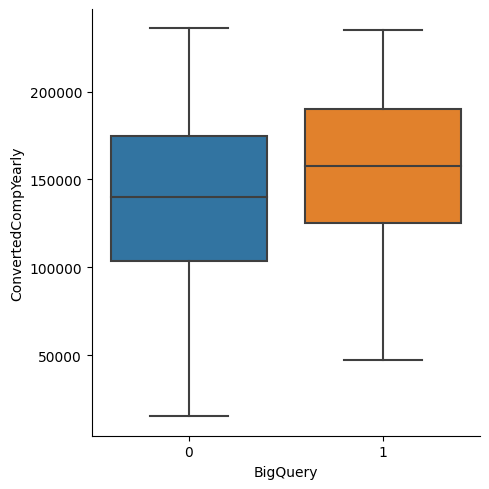

In [ ]:
#BigQuery Analysis
sns.catplot(data=final_survey,kind='box',x='BigQuery',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

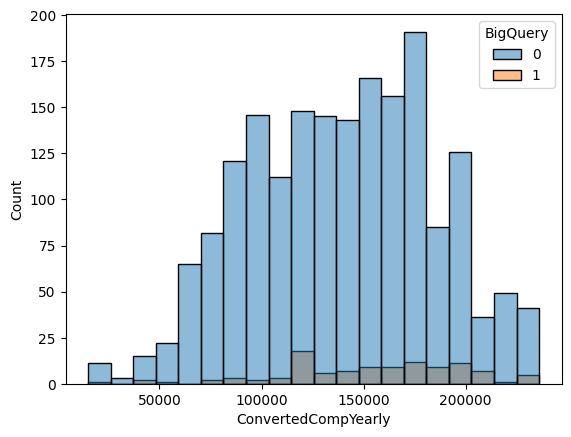

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'BigQuery')

In [ ]:
BigQuery_summ = final_survey.groupby('BigQuery')['ConvertedCompYearly'].describe()
BigQuery_summ

count           mean           std      min       25%       50%  \
BigQuery                                                                     
0         1863.0  139245.202899  44736.052741  15080.0  103750.0  140000.0   
1          108.0  154831.046296  43764.016225  15080.0  125000.0  157500.0   

               75%       max  
BigQuery                      
0         174900.0  236000.0  
1         190000.0  235000.0

In [ ]:
BigQuery0= final_survey[final_survey['BigQuery']==0]['ConvertedCompYearly']
BigQuery1 = final_survey[final_survey['BigQuery']==1]['ConvertedCompYearly']
stats.ttest_ind(a=BigQuery0, b=BigQuery1,equal_var=True)

TtestResult(statistic=-3.524158729104788, pvalue=0.0004345275304068384, df=1969.0)

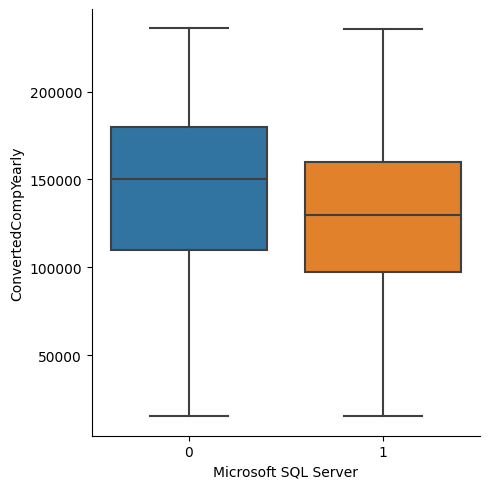

In [ ]:
#Microsoft SQL Server
sns.catplot(data=final_survey,kind='box',x='Microsoft SQL Server',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

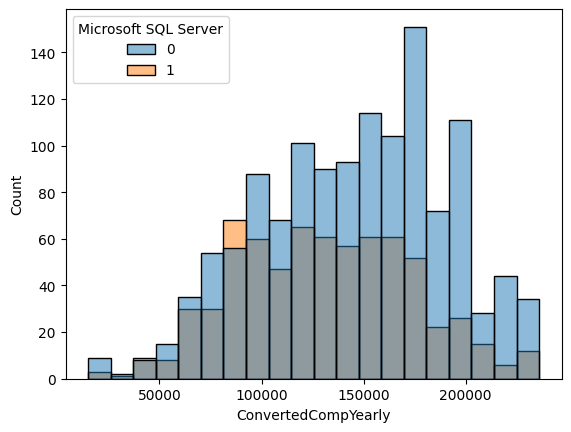

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'Microsoft SQL Server')

In [ ]:
MS_SQL_summ = final_survey.groupby('Microsoft SQL Server')['ConvertedCompYearly'].describe()
MS_SQL_summ

count           mean           std      min       25%  \
Microsoft SQL Server                                                           
0                     1277.0  145136.776821  45275.417841  15080.0  110000.0   
1                      694.0  130829.829971  42445.436805  15080.0   97000.0   

                           50%       75%       max  
Microsoft SQL Server                                
0                     150000.0  180000.0  236000.0  
1                     130000.0  160000.0  235500.0

In [ ]:
MS_0= final_survey[final_survey['Microsoft SQL Server']==0]['ConvertedCompYearly']
MS_1 = final_survey[final_survey['Microsoft SQL Server']==1]['ConvertedCompYearly']
stats.ttest_ind(a=MS_0, b=MS_1,equal_var=True)

TtestResult(statistic=6.848177110144083, pvalue=9.961692614494108e-12, df=1969.0)

In [ ]:
databases = final_survey[['MySQL', 'PostgreSQL', 'BigQuery', 'Microsoft SQL Server', 'ConvertedCompYearly']]
databases.head()

MySQL  PostgreSQL  BigQuery  Microsoft SQL Server  ConvertedCompYearly
6        1           1         0                     1             135000.0
7        1           0         0                     0              80000.0
36       0           0         0                     1             130000.0
239      0           1         0                     0             120000.0
526      0           0         0                     0             215000.0

In [ ]:
df = pd.DataFrame(columns=['Database', 'Uses Database', 'ConvertedCompYearly'])
for name in ['MySQL', 'PostgreSQL', 'BigQuery', 'Microsoft SQL Server']:
  sub = databases[[name, 'ConvertedCompYearly']].rename(columns={name:'Uses Database'})

  sub.insert(loc=0,column='Database',value=name)
  df = pd.concat((df,sub),axis=0)
df = df.reset_index(drop=True)
df


Database Uses Database  ConvertedCompYearly
0                    MySQL             1             135000.0
1                    MySQL             1              80000.0
2                    MySQL             0             130000.0
3                    MySQL             0             120000.0
4                    MySQL             0             215000.0
...                    ...           ...                  ...
7879  Microsoft SQL Server             0             115000.0
7880  Microsoft SQL Server             0             210000.0
7881  Microsoft SQL Server             0             187000.0
7882  Microsoft SQL Server             0             200000.0
7883  Microsoft SQL Server             1              90000.0

[7884 rows x 3 columns]

In [ ]:
import plotly.express as px
fig = px.box(df, x='Database', y='ConvertedCompYearly', color='Uses Database')
fig.show()

<Axes: >

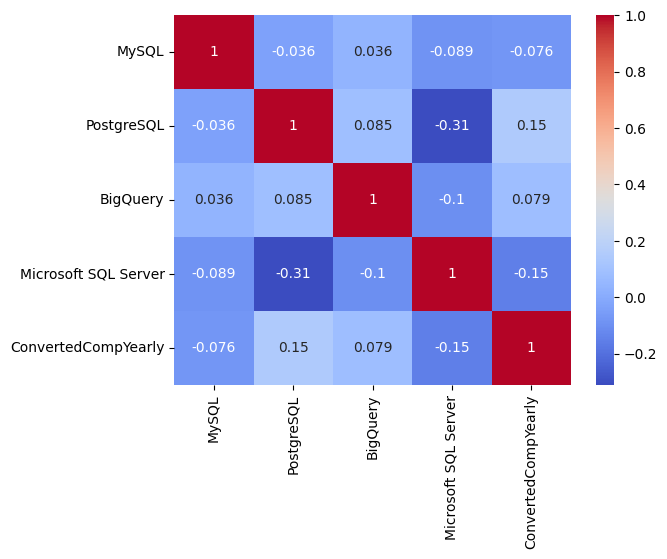

In [ ]:
#Correlation: heatmap
sns.heatmap(databases.corr(), annot = True, cmap = 'coolwarm')

### Step 3: PlatformHaveWorkedWith vs ConvertedCompYearly

In [ ]:
#pull out key PlatformHaveWorkedWith
final_survey['Amazon Web Services (AWS)'] = [1 if 'Amazon Web Services (AWS)' in x else 0 for x in final_survey['PlatformHaveWorkedWith']]
final_survey['Google Cloud'] = [1 if 'Google Cloud' in x else 0 for x in final_survey['PlatformHaveWorkedWith']]
final_survey['Microsoft Azure'] = [1 if 'Microsoft Azure' in x else 0 for x in final_survey['PlatformHaveWorkedWith']]
final_survey['Vercel'] = [1 if 'Vercel' in x else 0 for x in final_survey['PlatformHaveWorkedWith']]
final_survey['Cloudflare'] = [1 if 'Cloudflare' in x else 0 for x in final_survey['PlatformHaveWorkedWith']]
final_survey.head()

Age           Employment  \
6    35-44 years old  Employed, full-time   
7    25-34 years old  Employed, full-time   
36   55-64 years old  Employed, full-time   
239  25-34 years old  Employed, full-time   
526  25-34 years old  Employed, full-time   

                               RemoteWork  \
6                                  Remote   
7                                  Remote   
36   Hybrid (some remote, some in-person)   
239                                Remote   
526  Hybrid (some remote, some in-person)   

                                      CodingActivities  \
6    Hobby;Contribute to open-source projects;Profe...   
7                                                Hobby   
36   Bootstrapping a business;Professional developm...   
239  Hobby;Professional development or self-paced l...   
526                       I don’t code outside of work   

                                               EdLevel  \
6    Some college/university study without earning ...   
7         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
36   Some college/university study without earning ...   
239       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
526       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                             LearnCode YearsCode  \
6    Friend or family member;Online Courses or Cert...         4   
7    Books / Physical media;Online Courses or Certi...         5   
36   Books / Physical media;Online Courses or Certi...        33   
239  Books / Physical media;Colleague;Friend or fam...        11   
526  Hackathons (virtual or in-person);On the job t...        17   

                   DevType                   OrgSize  \
6    Developer, full-stack  1,000 to 4,999 employees   
7    Developer, full-stack        10 to 19 employees   
36   Developer, full-stack      100 to 499 employees   
239  Developer, full-stack        10 to 19 employees   
526  Developer, full-stack      100 to 499 employees   

                      Country  ...  R MySQL PostgreSQL  BigQuery  \
6    United States of America  ...  1     1          1         0   
7    United States of America  ...  1     1          0         0   
36   United States of America  ...  0     0          0         0   
239  United States of America  ...  0     0          1         0   
526  United States of America  ...  0     0          0         0   

    Microsoft SQL Server Amazon Web Services (AWS) Google Cloud  \
6                      1                         1            0   
7                      0                         1            0   
36                     1                         0            0   
239                    0                         1            0   
526                    0                         1            0   

    Microsoft Azure  Vercel  Cloudflare  
6                 0       0           0  
7                 0       1           0  
36                1       0           0  
239               0       0           0  
526               0       0           0  

[5 rows x 36 columns]

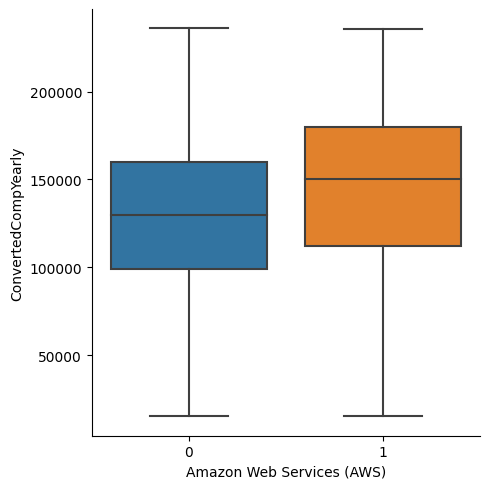

In [ ]:
#Amazon Web Services (AWS)
sns.catplot(data=final_survey,kind='box',x='Amazon Web Services (AWS)',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

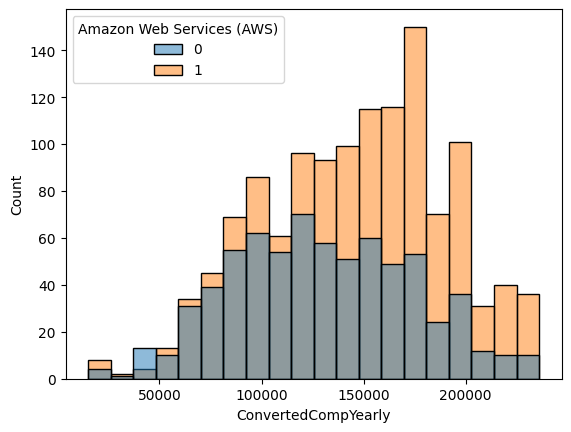

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'Amazon Web Services (AWS)')

In [ ]:
AWS_summ = final_survey.groupby('Amazon Web Services (AWS)')['ConvertedCompYearly'].describe()
AWS_summ

count           mean           std      min  \
Amazon Web Services (AWS)                                                 
0                           702.0  129957.198006  43805.999829  15080.0   
1                          1269.0  145709.702916  44392.437354  15080.0   

                                25%       50%       75%       max  
Amazon Web Services (AWS)                                          
0                           99000.0  130000.0  160000.0  236000.0  
1                          112000.0  150000.0  180000.0  235500.0

In [ ]:
AWS_0= final_survey[final_survey['Amazon Web Services (AWS)']==0]['ConvertedCompYearly']
AWS_1 = final_survey[final_survey['Amazon Web Services (AWS)']==1]['ConvertedCompYearly']
stats.ttest_ind(a=AWS_0, b=AWS_1,equal_var=True)

TtestResult(statistic=-7.579407733348099, pvalue=5.3114178903773105e-14, df=1969.0)

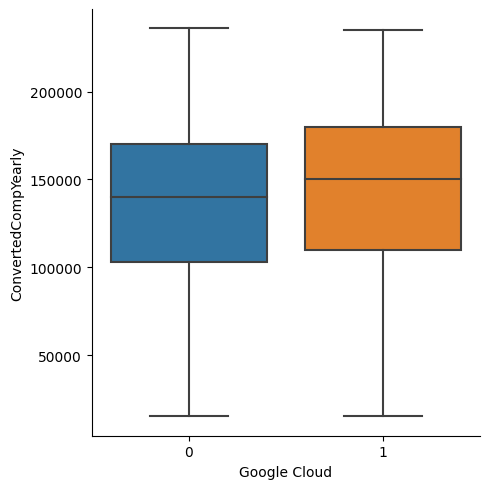

In [ ]:
#Google Cloud
sns.catplot(data=final_survey,kind='box',x='Google Cloud',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

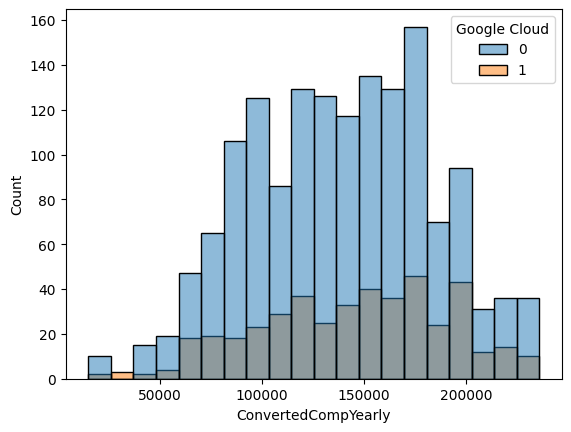

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'Google Cloud')

In [ ]:
GC_summ = final_survey.groupby('Google Cloud')['ConvertedCompYearly'].describe()
GC_summ

count           mean           std      min       25%  \
Google Cloud                                                           
0             1533.0  138779.457273  44399.263015  15080.0  103000.0   
1              438.0  144718.397260  45986.320555  15080.0  110000.0   

                   50%       75%       max  
Google Cloud                                
0             140000.0  170000.0  236000.0  
1             150000.0  180000.0  235000.0

In [ ]:
GC_0= final_survey[final_survey['Google Cloud']==0]['ConvertedCompYearly']
GC_1 = final_survey[final_survey['Google Cloud']==1]['ConvertedCompYearly']
stats.ttest_ind(a=GC_0, b=GC_1,equal_var=True)

TtestResult(statistic=-2.4491707119107198, pvalue=0.014405170218417944, df=1969.0)

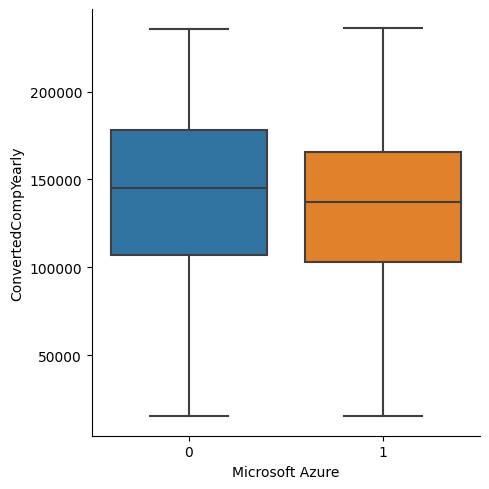

In [ ]:
#Microsoft Azure
sns.catplot(data=final_survey,kind='box',x='Microsoft Azure',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

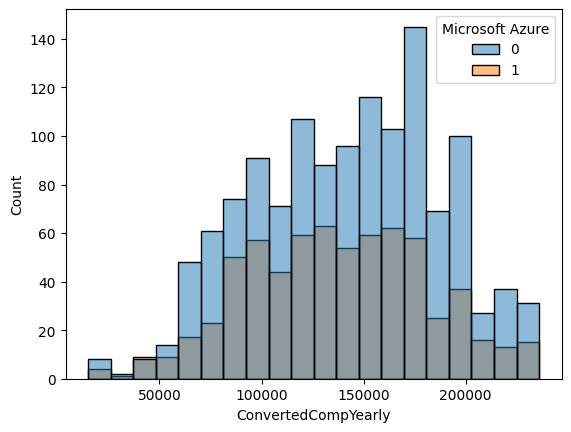

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'Microsoft Azure')

In [ ]:
MA_summ = final_survey.groupby('Microsoft Azure')['ConvertedCompYearly'].describe()
MA_summ

count           mean           std      min       25%  \
Microsoft Azure                                                           
0                1296.0  141727.137346  45361.838165  15080.0  106750.0   
1                 675.0  136973.623704  43603.204431  15080.0  103000.0   

                      50%       75%       max  
Microsoft Azure                                
0                145000.0  178000.0  235500.0  
1                137000.0  165500.0  236000.0

In [ ]:
MA_0= final_survey[final_survey['Microsoft Azure']==0]['ConvertedCompYearly']
MA_1 = final_survey[final_survey['Microsoft Azure']==1]['ConvertedCompYearly']
stats.ttest_ind(a=MA_0, b=MA_1,equal_var=True)

TtestResult(statistic=2.2369782609928137, pvalue=0.02539928926869393, df=1969.0)

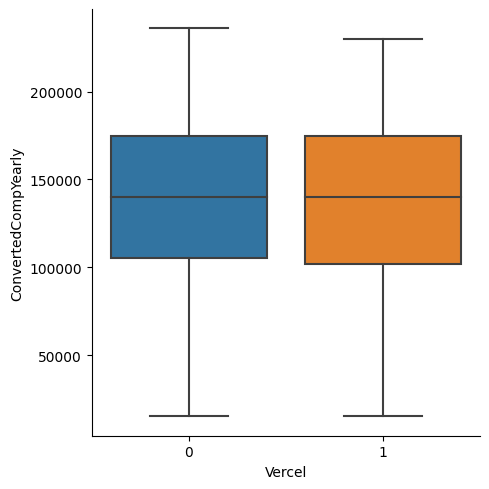

In [ ]:
#Vercel
sns.catplot(data=final_survey,kind='box',x='Vercel',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

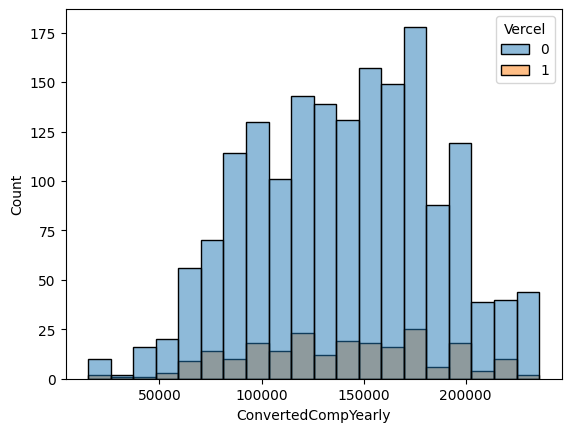

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'Vercel')

In [ ]:
Vercel_summ = final_survey.groupby('Vercel')['ConvertedCompYearly'].describe()
Vercel_summ

count           mean           std      min       25%       50%  \
Vercel                                                                     
0       1746.0  140366.465063  44651.003731  15080.0  105000.0  140000.0   
1        225.0  138025.413333  46100.676188  15080.0  102000.0  140000.0   

             75%       max  
Vercel                      
0       175000.0  236000.0  
1       175000.0  230000.0

In [ ]:
Vercel_0= final_survey[final_survey['Vercel']==0]['ConvertedCompYearly']
Vercel_1 = final_survey[final_survey['Vercel']==1]['ConvertedCompYearly']
stats.ttest_ind(a=Vercel_0, b=Vercel_1,equal_var=True)

TtestResult(statistic=0.7374385251563937, pvalue=0.46094358126980595, df=1969.0)

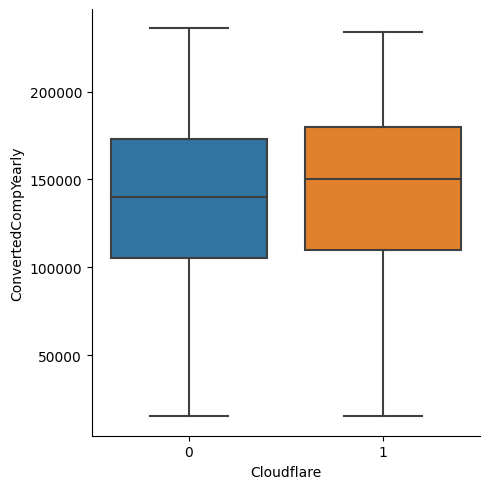

In [ ]:
#Cloudflare
sns.catplot(data=final_survey,kind='box',x='Cloudflare',y='ConvertedCompYearly',showfliers=False)

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

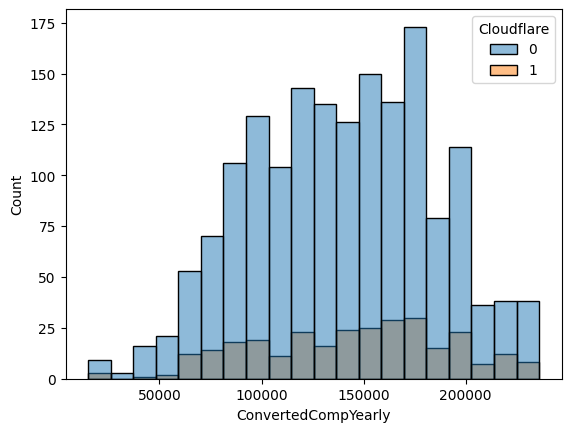

In [ ]:
sns.histplot(data=final_survey, x='ConvertedCompYearly', hue= 'Cloudflare')

In [ ]:
Cloudflare_summ = final_survey.groupby('Cloudflare')['ConvertedCompYearly'].describe()
Cloudflare_summ

count           mean           std      min       25%       50%  \
Cloudflare                                                                     
0           1679.0  139394.846337  44484.490722  15080.0  105000.0  140000.0   
1            292.0  144149.380137  46529.537662  15080.0  109750.0  150000.0   

                 75%       max  
Cloudflare                      
0           173000.0  236000.0  
1           180000.0  234000.0

In [ ]:
CF_0= final_survey[final_survey['Cloudflare']==0]['ConvertedCompYearly']
CF_1 = final_survey[final_survey['Cloudflare']==1]['ConvertedCompYearly']
stats.ttest_ind(a=CF_0, b=CF_1,equal_var=True)

TtestResult(statistic=-1.6740754681234995, pvalue=0.09427458869716769, df=1969.0)

In [ ]:
platforms = final_survey[['Amazon Web Services (AWS)', 'Google Cloud', 'Microsoft Azure', 'Vercel', 'Cloudflare', 'ConvertedCompYearly']]
platforms.head()

Amazon Web Services (AWS)  Google Cloud  Microsoft Azure  Vercel  \
6                            1             0                0       0   
7                            1             0                0       1   
36                           0             0                1       0   
239                          1             0                0       0   
526                          1             0                0       0   

     Cloudflare  ConvertedCompYearly  
6             0             135000.0  
7             0              80000.0  
36            0             130000.0  
239           0             120000.0  
526           0             215000.0

In [ ]:
platforms_1 = final_survey[['Amazon Web Services (AWS)', 'Google Cloud', 'Microsoft Azure', 'ConvertedCompYearly']]
platforms_1.head()

Amazon Web Services (AWS)  Google Cloud  Microsoft Azure  \
6                            1             0                0   
7                            1             0                0   
36                           0             0                1   
239                          1             0                0   
526                          1             0                0   

     ConvertedCompYearly  
6               135000.0  
7                80000.0  
36              130000.0  
239             120000.0  
526             215000.0

In [ ]:
df = pd.DataFrame(columns=['Platform', 'Uses Platform', 'ConvertedCompYearly'])
for name in ['Amazon Web Services (AWS)', 'Google Cloud', 'Microsoft Azure']:
  sub = platforms_1[[name, 'ConvertedCompYearly']].rename(columns={name:'Uses Platform'})

  sub.insert(loc=0,column='Platform',value=name)
  df = pd.concat((df,sub),axis=0)
df = df.reset_index(drop=True)
df

Platform Uses Platform  ConvertedCompYearly
0     Amazon Web Services (AWS)             1             135000.0
1     Amazon Web Services (AWS)             1              80000.0
2     Amazon Web Services (AWS)             0             130000.0
3     Amazon Web Services (AWS)             1             120000.0
4     Amazon Web Services (AWS)             1             215000.0
...                         ...           ...                  ...
5908            Microsoft Azure             0             115000.0
5909            Microsoft Azure             1             210000.0
5910            Microsoft Azure             0             187000.0
5911            Microsoft Azure             0             200000.0
5912            Microsoft Azure             1              90000.0

[5913 rows x 3 columns]

In [ ]:
import plotly.express as px
fig = px.box(df, x='Platform', y='ConvertedCompYearly', color='Uses Platform')
fig.show()

<Axes: >

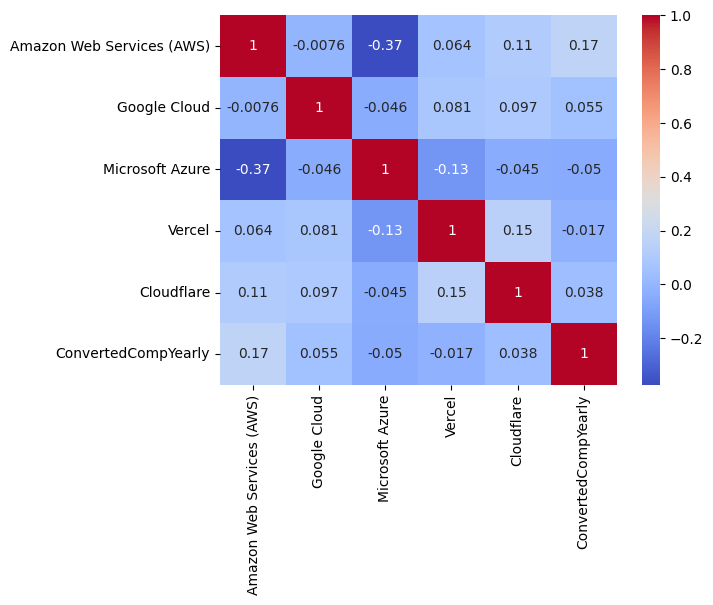

In [ ]:
#Correlation: heatmap
sns.heatmap(platforms.corr(), annot = True, cmap = 'coolwarm')

### Step 4: Correlation between language, database, platform, and compensation

In [ ]:
lang_data_plat = final_survey[['C_plus', 'C_sharp', 'HTML/CSS', 'Python', 'R', 'SQL', 'Java', 'JavaScript', 'MySQL', 'PostgreSQL', 'BigQuery', 'Microsoft SQL Server', 'Amazon Web Services (AWS)', 'Google Cloud', 'Microsoft Azure', 'Vercel', 'Cloudflare', 'ConvertedCompYearly']]
lang_data_plat.head()

C_plus  C_sharp  HTML/CSS  Python  R  SQL  Java  JavaScript  MySQL  \
6         0        0         1       0  1    0     1           1      1   
7         0        0         1       1  1    1     1           1      1   
36        0        1         1       0  0    1     1           1      0   
239       0        0         1       1  0    1     1           1      0   
526       0        0         1       0  0    0     1           1      0   

     PostgreSQL  BigQuery  Microsoft SQL Server  Amazon Web Services (AWS)  \
6             1         0                     1                          1   
7             0         0                     0                          1   
36            0         0                     1                          0   
239           1         0                     0                          1   
526           0         0                     0                          1   

     Google Cloud  Microsoft Azure  Vercel  Cloudflare  ConvertedCompYearly  
6               0                0       0           0             135000.0  
7               0                0       1           0              80000.0  
36              0                1       0           0             130000.0  
239             0                0       0           0             120000.0  
526             0                0       0           0             215000.0

<Axes: >

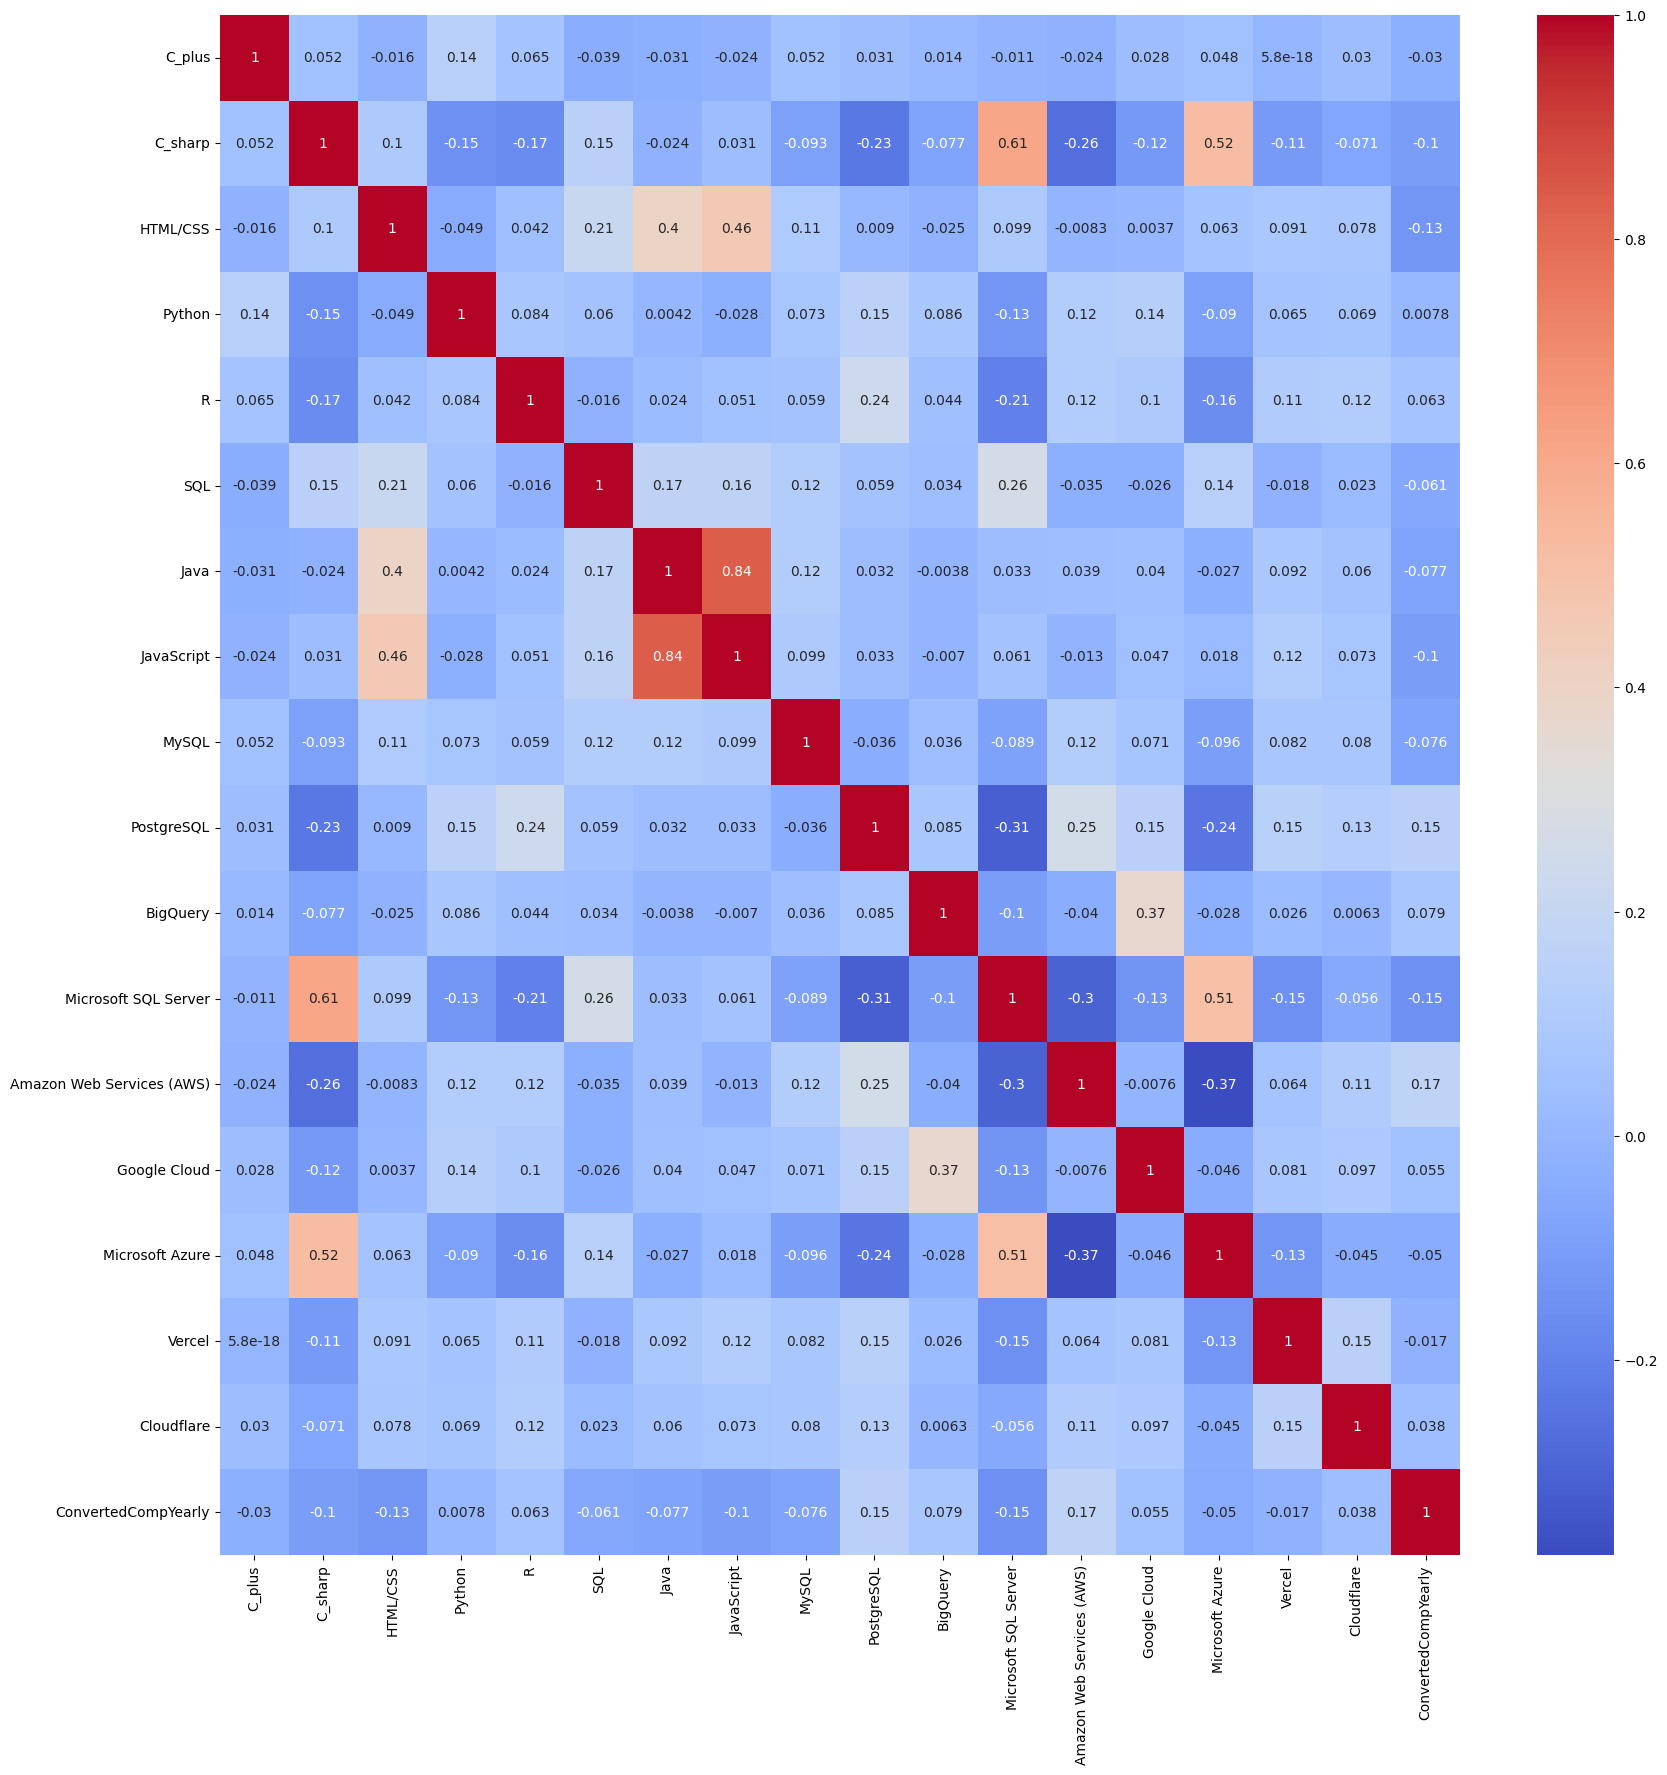

In [ ]:
#Correlation: heatmap
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(lang_data_plat.corr(), annot = True, cmap = 'coolwarm')

##3. “What is the primary learning source for developers? Does the number of sources affect the salary? How do the learning source preferences change as developers gain experience?”

### Step 1: Check the nature of the data type in 'LearnCode'

In [ ]:
final_survey['LearnCode'].dtype

dtype('O')

In [ ]:
final_survey['LearnCode'].value_counts()

Books / Physical media;Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                                94
Books / Physical media;Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum)                                                                                                                                        81
Books / Physical media;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                                                                77
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                           

In [ ]:
list_source=final_survey['LearnCode'].str.split(";").explode().value_counts()
list_source

Other online resources (e.g., videos, blogs, forum)    1653
On the job training                                    1272
Books / Physical media                                 1176
School (i.e., University, College, etc)                1085
Online Courses or Certification                        1003
Colleague                                               507
Friend or family member                                 228
Coding Bootcamp                                         208
Hackathons (virtual or in-person)                       200
Other (please specify):                                 141
Name: LearnCode, dtype: int64

### Step 2: Create a pie chart to show the distribution of learning sources

In [ ]:
source=list_source.index
size=list_source.values

data={'Sources': source,'Size': size}
df=pd.DataFrame(data)

fig=px.pie(df,names='Sources',values='Size',title='Distribution of LearnCode')

fig.show()

### Step 3: Add a new column by counting the number of sources

In [ ]:
final_survey['NumSources']=final_survey['LearnCode'].str.count(';') + 1
final_survey

Age           Employment  \
6      35-44 years old  Employed, full-time   
7      25-34 years old  Employed, full-time   
36     55-64 years old  Employed, full-time   
239    25-34 years old  Employed, full-time   
526    25-34 years old  Employed, full-time   
...                ...                  ...   
89031  25-34 years old  Employed, full-time   
89061  35-44 years old  Employed, full-time   
89112  25-34 years old  Employed, full-time   
89113  35-44 years old  Employed, full-time   
89143  25-34 years old  Employed, full-time   

                                 RemoteWork  \
6                                    Remote   
7                                    Remote   
36     Hybrid (some remote, some in-person)   
239                                  Remote   
526    Hybrid (some remote, some in-person)   
...                                     ...   
89031  Hybrid (some remote, some in-person)   
89061                                Remote   
89112                                Remote   
89113  Hybrid (some remote, some in-person)   
89143                             In-person   

                                        CodingActivities  \
6      Hobby;Contribute to open-source projects;Profe...   
7                                                  Hobby   
36     Bootstrapping a business;Professional developm...   
239    Hobby;Professional development or self-paced l...   
526                         I don’t code outside of work   
...                                                  ...   
89031                                              Hobby   
89061  Hobby;Professional development or self-paced l...   
89112                                              Hobby   
89113  Hobby;Contribute to open-source projects;Profe...   
89143  Hobby;Professional development or self-paced l...   

                                                 EdLevel  \
6      Some college/university study without earning ...   
7           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
36     Some college/university study without earning ...   
239         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
526         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                  ...   
89031       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
89061       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
89112       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
89113       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
89143       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                               LearnCode YearsCode  \
6      Friend or family member;Online Courses or Cert...         4   
7      Books / Physical media;Online Courses or Certi...         5   
36     Books / Physical media;Online Courses or Certi...        33   
239    Books / Physical media;Colleague;Friend or fam...        11   
526    Hackathons (virtual or in-person);On the job t...        17   
...                                                  ...       ...   
89031  Books / Physical media;Online Courses or Certi...        20   
89061  Online Courses or Certification;On the job tra...         7   
89112  Online Courses or Certification;On the job tra...        11   
89113        On the job training;Other (please specify):        20   
89143  Books / Physical media;Online Courses or Certi...        12   

                     DevType                   OrgSize  \
6      Developer, full-stack  1,000 to 4,999 employees   
7      Developer, full-stack        10 to 19 employees   
36     Developer, full-stack      100 to 499 employees   
239    Developer, full-stack        10 to 19 employees   
526    Developer, full-stack      100 to 499 employees   
...                      ...                       ...   
89031  Developer, full-stack      100 to 499 employees   
89061  Developer, full-stack  10,000 or more employees   
89112  Developer, full-stack  1,000 to 4,999 employees   
89113  Developer, full-sta

In [ ]:
final_survey['NumSources'].value_counts()

4    490
3    476
5    327
2    287
6    155
1    125
7     76
8     26
9      9
Name: NumSources, dtype: int64

### Step 4: Create a box plot and scatter plot to show the number of sources by the salary

In [ ]:
import plotly.express as px
fig=px.box(final_survey,x='NumSources',y='ConvertedCompYearly',color='NumSources',points='all',
           title='Box Plot: Number of Sources vs. Yearly Compensation',)
fig.show()

In [ ]:
fig=px.scatter(final_survey, x='NumSources', y='ConvertedCompYearly', color='NumSources',
                 title='Scatter Plot: Number of Sources vs. Yearly Compensation',
                 labels={'NumSources': 'Number of Sources', 'ConvertedCompYearly': 'Yearly Salary'})
plt.savefig('./2.png')

fig.show()

<Figure size 640x480 with 0 Axes>

### Step 5: Clean the data for 'YearsCode' to explore the relatonship between the number of sources and years of coding experience

In [ ]:
final_survey['YearsCode']=final_survey['YearsCode'].replace({'Less than 1 year':0,'More than 50 years':50})
final_survey['YearsCode']

6         4
7         5
36       33
239      11
526      17
         ..
89031    20
89061     7
89112    11
89113    20
89143    12
Name: YearsCode, Length: 1971, dtype: object

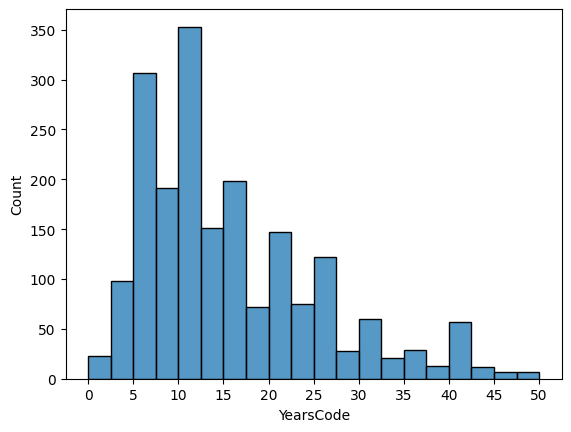

In [ ]:
final_survey=final_survey.dropna(subset=['YearsCode'])
final_survey['YearsCode']=final_survey['YearsCode'].astype('int')
sns.histplot(final_survey['YearsCode'],bins=20)
plt.xticks(range(0,51,5))
plt.show()

[6 4 7 2 3 8 5 1]


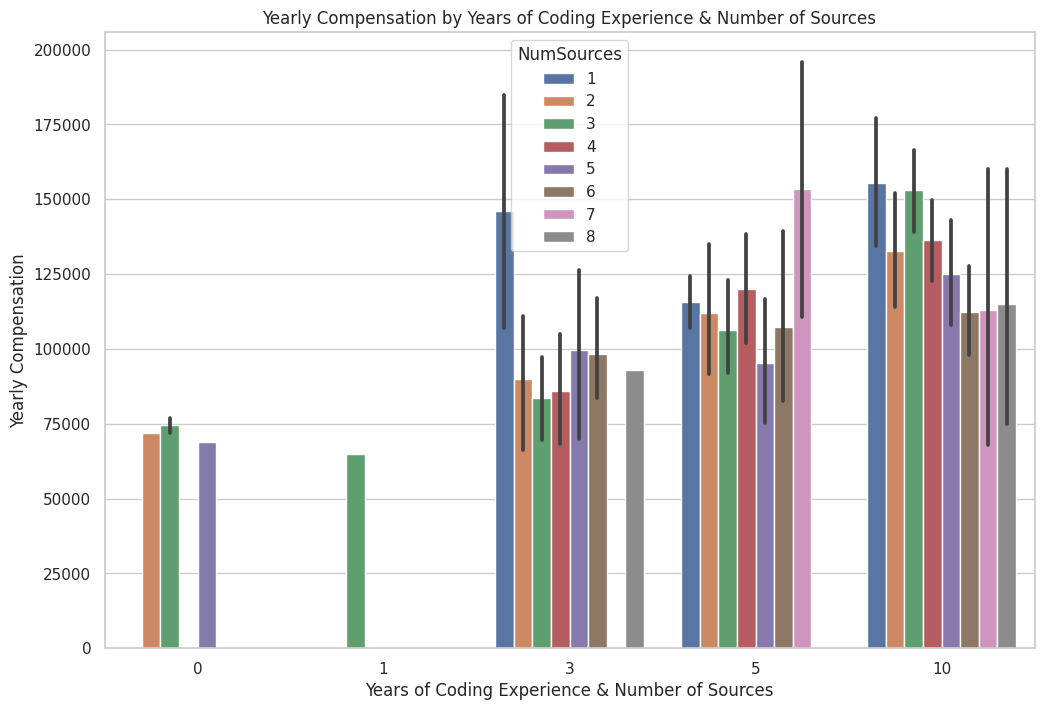

In [ ]:
selected_years = [0, 1, 3, 5, 10]
filtered_survey = final_survey[final_survey['YearsCode'].isin(selected_years)]

print(filtered_survey['NumSources'].unique())

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='YearsCode', y='ConvertedCompYearly', hue='NumSources', data=filtered_survey)

plt.xlabel('Years of Coding Experience & Number of Sources')
plt.ylabel('Yearly Compensation')
plt.title('Yearly Compensation by Years of Coding Experience & Number of Sources')

plt.show()

##4. "These days, companies are adopting various work arrangements. Do people receive higher pay when working remotely, or in-person, or in a hybrid model?"

### Step 1: Create a boxplot to show distribution of ConvertedCompYearly by work arrangement

In [ ]:
import plotly.express as px
import pandas as pd

fig = px.box(final_survey,y='ConvertedCompYearly',x='RemoteWork',points='all',color='RemoteWork',title='Distribution of Salary Based On Work Type')
fig.update_layout(width=1000, height=600)
fig.show()

###Step 2: Conduct T-test to show differences in ConvertedCompYearly in different work arrangement

In [ ]:
## t test
## 1.to test if the total compensation for people who work remotely would significantly different from people who work in person
import scipy.stats as stats
remote1=final_survey[final_survey['RemoteWork']=='Remote']['ConvertedCompYearly']
remote0=final_survey[final_survey['RemoteWork']=='In-person']['ConvertedCompYearly']
stats.ttest_ind(a=remote1, b=remote0,equal_var=True)


TtestResult(statistic=9.517043530678603, pvalue=7.814656445067352e-21, df=1358.0)

In [ ]:
## t test
## 2.to test if the total compensation for people who work remotely would significantly different from people who work hybrid
import scipy.stats as stats
hybrid0=final_survey[final_survey['RemoteWork']=='Remote']['ConvertedCompYearly']
hybrid1=final_survey[final_survey['RemoteWork']=='Hybrid (some remote, some in-person)']['ConvertedCompYearly']
stats.ttest_ind(a=hybrid0, b=hybrid1,equal_var=True)

TtestResult(statistic=3.7157815611272906, pvalue=0.0002086661972488008, df=1828.0)

In [ ]:
## t test
## 3.to test if the total compensation for people who work hybridly would significantly different from people who work in person
import scipy.stats as stats
inperson1=final_survey[final_survey['RemoteWork']=='In-person']['ConvertedCompYearly'].fillna(0)
inperson0=final_survey[final_survey['RemoteWork']=='Hybrid (some remote, some in-person)']['ConvertedCompYearly'].fillna(0)
stats.ttest_ind(a=inperson1, b=inperson0,equal_var=True)

TtestResult(statistic=-6.763267663979526, pvalue=2.715832674284755e-11, df=750.0)

### Step 3: How company size has an impact on ConvertedCompYearly in different work arrangement

In [ ]:
small = ['Just me - I am a freelancer, sole proprietor, etc.',
         '2 to 9 employees', '10 to 19 employees',
         '20 to 99 employees', '100 to 499 employees']
final_survey['bigSmall'] = [1 if x in small else
                    None if x == "I don't know" else
                    0 for x in final_survey['OrgSize']]
smallComp= final_survey[final_survey['bigSmall'] == 1]['ConvertedCompYearly']
bigComp= final_survey[final_survey['bigSmall'] == 0]['ConvertedCompYearly']

fig = px.scatter(final_survey, x='RemoteWork', y='ConvertedCompYearly',color='bigSmall', title='Scatter Plot of Remote Work vs. Yearly Compensation')
fig.update_layout(xaxis_title='Remote Work', yaxis_title='Yearly Compensation',width=600, height=600)

fig.show()

### Step 4: How industry has an impact on ConvertedCompYearly in different work arrangement

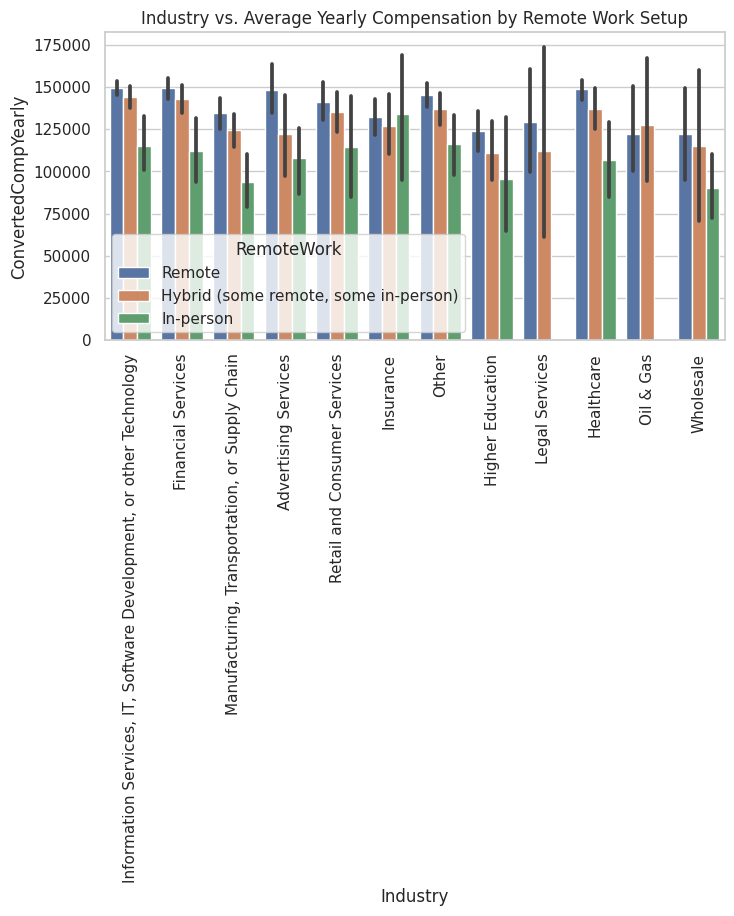

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(x='Industry', y='ConvertedCompYearly', hue='RemoteWork', data=final_survey)
plt.xticks(rotation=90)
plt.title('Industry vs. Average Yearly Compensation by Remote Work Setup')
plt.show()

##5. “For professional developers, do small companies pay them more than the big ones? For those small companies, what is the average age and their salary?”

### Step 1: Create a boxplot to show distribution of ConvertedCompYearly by organization size

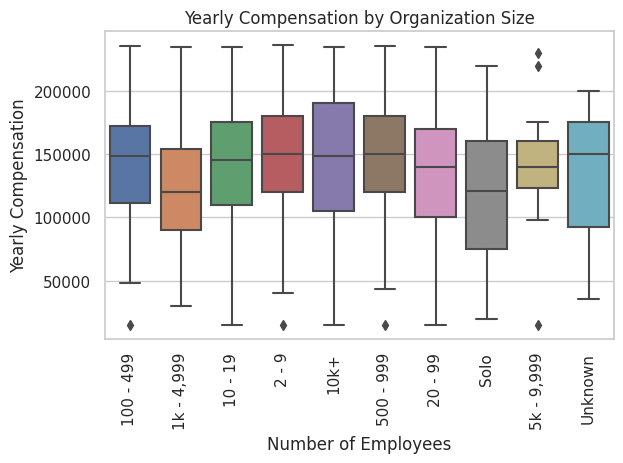

In [ ]:
g = sns.boxplot(
    data= final_survey,
    x= 'OrgSize',
    y= 'ConvertedCompYearly',
)

plt.xticks(rotation=90)
g.set(xticklabels=['100 - 499', '1k - 4,999', '10 - 19', '2 - 9',
                   '10k+', '500 - 999', '20 - 99', 'Solo',
                   '5k - 9,999', 'Unknown'])
plt.xlabel('Number of Employees')
plt.ylabel('Yearly Compensation')
plt.title('Yearly Compensation by Organization Size')
plt.tight_layout()
plt.show()

### Step 2: Define "small" and "big" companies.  Then, create a variable where 1 indicates a small company and 0 indicates a big company.  Then, create variables to hold a pandas series of compensation for big companies and small companies.

In [ ]:
small = ['Just me - I am a freelancer, sole proprietor, etc.',
         '2 to 9 employees', '10 to 19 employees',
         '20 to 99 employees', '100 to 499 employees']
final_survey['bigSmall'] = [1 if x in small else
                    None if x == "I don't know" else
                    0 for x in final_survey['OrgSize']]
smallComp= final_survey[final_survey['bigSmall'] == 1]['ConvertedCompYearly']
bigComp= final_survey[final_survey['bigSmall'] == 0]['ConvertedCompYearly']

### Step 3: Create a boxplot to show the distribution of compensation by organization size

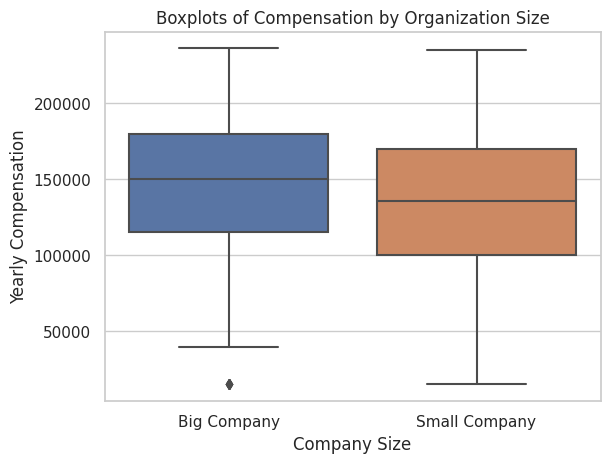

In [ ]:
g = sns.boxplot(
    data= final_survey,
    x= 'bigSmall',
    y= 'ConvertedCompYearly',
)
g.set(xticklabels=['Big Company', 'Small Company'])
plt.xlabel('Company Size')
plt.ylabel('Yearly Compensation')
plt.title('Boxplots of Compensation by Organization Size')
plt.show()

### Step 4: Perform statistical tests.  First one with an alternative hypothesis that the mean compensation differs and the second with an alternative hypothesis that the mean compensation of small companies is less than big companies.  Alpha is set to 0.01

In [ ]:
alpha = 0.01
tStat, pVal = stats.ttest_ind(smallComp, bigComp)
tStat2, pVal2 = stats.ttest_ind(smallComp, bigComp, alternative= 'less')
if pVal > alpha:
  print('there is no difference between the means')
else:
  print('Reject the null hypothesis.  There is a difference in average pay between the two sizes.')
  print(f'test statistic: {tStat}\tp-value: {pVal}')
if pVal2 > alpha:
  print('Small companies do not pay less on average.')
else:
  print('Reject the null hypothesis.  Small companies pay less on average.')
  print(f'test statistic: {tStat2}\tp-value: {pVal2}')

Reject the null hypothesis.  There is a difference in average pay between the two sizes.
test statistic: -5.979429150757642	p-value: 2.6521852761189076e-09
Reject the null hypothesis.  Small companies pay less on average.
test statistic: -5.979429150757642	p-value: 1.3260926380594538e-09


### Step 5: Create histogram plots with the density estimator on for both small and big company compensation distributions.

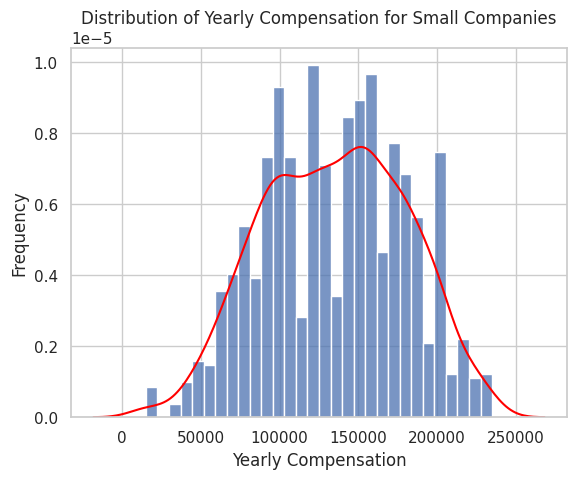

In [ ]:
sns.histplot(smallComp, stat='density', bins= 30)
sns.kdeplot(smallComp, color= 'red')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Yearly Compensation for Small Companies')
plt.show()

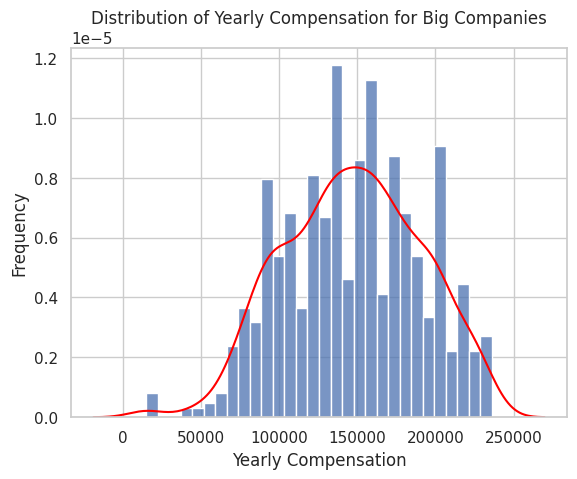

In [ ]:
sns.histplot(bigComp, stat='density', bins= 30)
sns.kdeplot(bigComp, color= 'red')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Yearly Compensation for Big Companies')
plt.show()

### Step 6: Create a barplot showing distribution of compensation by age, colored by company size

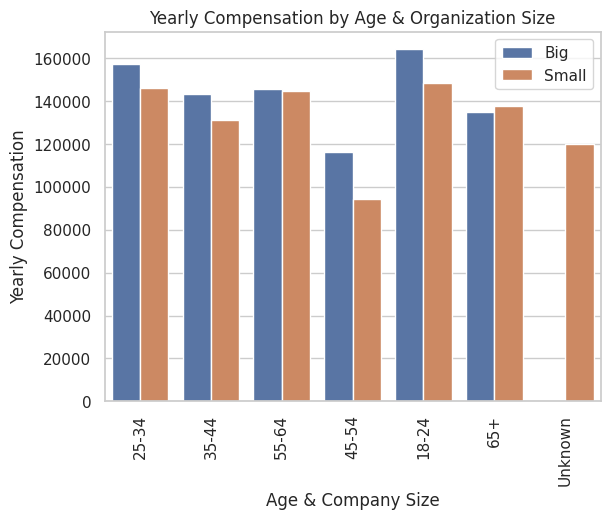

In [ ]:
g = sns.barplot(data=final_survey,
            x='Age',
            y= 'ConvertedCompYearly',
            hue='bigSmall',
            errorbar= None)
plt.xticks(rotation=90)
plt.xlabel('Age & Company Size')
plt.ylabel('Yearly Compensation')
plt.title('Yearly Compensation by Age & Organization Size')
g.set(xticklabels=['25-34', '35-44', '55-64','45-54',
                   '18-24','65+','Unknown'])
plt.legend(labels=['Big', 'Small'])
plt.show()

### Step 7: Look at the age distribution for big and small companies

In [ ]:
bigAge = final_survey[final_survey['bigSmall'] == 0]['Age'].value_counts()
smallAge = final_survey[final_survey['bigSmall'] == 1]['Age'].value_counts()
print('Big Organizations\n',bigAge)
print()
print('Small Organizations\n',smallAge)

Big Organizations
 25-34 years old      406
35-44 years old      216
45-54 years old      107
18-24 years old       84
55-64 years old       39
65 years or older      3
Name: Age, dtype: int64

Small Organizations
 25-34 years old      486
35-44 years old      370
45-54 years old      106
18-24 years old      103
55-64 years old       41
65 years or older      9
Prefer not to say      1
Name: Age, dtype: int64


### Step 8: Perform a t-test comparing the age distribution between big and small companies

In [ ]:
tStat, pVal = stats.ttest_ind(bigAge, smallAge)
print(f'test statistic: {tStat}\tp-value: {pVal}')

test statistic: -0.1760844332981857	p-value: 0.8634274446311472


## 7. Regression Analysis

### Step 1: Create a dataframe with all regression variables.  Create dummy variables where necessary.

In [ ]:
final_survey.columns

Index(['Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'YearsCode', 'DevType', 'OrgSize', 'Country',
       'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'ConvertedCompYearly', 'Industry', 'AISent',
       'AIBen', 'AISelect', 'logComp', 'Python', 'HTML/CSS', 'JavaScript',
       'SQL', 'C_sharp', 'C_plus', 'Java', 'R', 'MySQL', 'PostgreSQL',
       'BigQuery', 'Microsoft SQL Server', 'Amazon Web Services (AWS)',
       'Google Cloud', 'Microsoft Azure', 'Vercel', 'Cloudflare', 'NumSources',
       'bigSmall'],
      dtype='object')

In [ ]:
regVars= final_survey[['logComp', 'Age','RemoteWork','EdLevel', 'LearnCode',
                       'YearsCode', 'Python', 'HTML/CSS', 'JavaScript', 'SQL',
                       'R', 'BigQuery', 'PostgreSQL', 'AIBen', 'AISent',
                       'Amazon Web Services (AWS)','bigSmall']]
# quantifying explanatory vars

# Age into "young" and "old"
young = ['25 - 34 years old', '35-44 years old']
regVars['young'] = [1 if x in young else 0 for x in regVars['Age']]

# EdLevel
regVars['EdLevel_Q'] = [
    24 if 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)' in x else
    18 if 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' in x else
    14 if 'Associate degree (A.A., A.S., etc.)' in x else
    13 if 'Some college/university study without earning a degree' in x else
    12 if 'Secondary School' in x else
    5 for x in regVars['EdLevel']
]

# AI Sentiment
regVars['AISentiment'] = [
    5 if x == 'Very favorable' else
    4 if x == 'Favorable' else
    3 if x == 'Indifferent' else
    2 if x == 'Unfavorable' else
    1 if x == 'Very unfavorable' else
    0 for x in regVars['AISent']
]

# AI Trust
regVars['AITrust']= [
    4 if x == 'Highly trust' else
    3 if x == 'Somewhat trust' else
    2 if x == 'Neither trust nor distrust' else
    1 if x == 'Somewhat distrust' else
    0 for x in regVars['AIBen']
]

# learning code from school
regVars['schoolCode'] = [1 if "University" in x
                         else 0 for x in regVars['LearnCode']]

# create remote work quantification
regVars['remote']= [1 if 'remote' in x.lower() else 0 for x in regVars['RemoteWork']]

regVars.head()

<ipython-input-178-bbef7fe825b0>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-178-bbef7fe825b0>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-178-bbef7fe825b0>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-178-b

logComp              Age                            RemoteWork  \
6    11.813030  35-44 years old                                Remote   
7    11.289782  25-34 years old                                Remote   
36   11.775290  55-64 years old  Hybrid (some remote, some in-person)   
239  11.695247  25-34 years old                                Remote   
526  12.278393  25-34 years old  Hybrid (some remote, some in-person)   

                                               EdLevel  \
6    Some college/university study without earning ...   
7         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
36   Some college/university study without earning ...   
239       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
526       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                             LearnCode  YearsCode  Python  \
6    Friend or family member;Online Courses or Cert...          4       0   
7    Books / Physical media;Online Courses or Certi...          5       1   
36   Books / Physical media;Online Courses or Certi...         33       0   
239  Books / Physical media;Colleague;Friend or fam...         11       1   
526  Hackathons (virtual or in-person);On the job t...         17       0   

     HTML/CSS  JavaScript  SQL  ...              AIBen       AISent  \
6           1           1    0  ...  Somewhat distrust  Unfavorable   
7           1           1    1  ...  Somewhat distrust    Favorable   
36          1           1    1  ...     Somewhat trust    Favorable   
239         1           1    1  ...  Somewhat distrust    Favorable   
526         1           1    0  ...  Somewhat distrust  Indifferent   

     Amazon Web Services (AWS) bigSmall young  EdLevel_Q  AISentiment  \
6                            1        0     1         13            2   
7                            1        1     0          5            4   
36                           0        1     0         13            4   
239                          1        1     0          5            4   
526                          1        1     0          5            3   

     AITrust  schoolCode  remote  
6          1           0       1  
7          1           1       1  
36         3           0       1  
239        1           1       1  
526        1           1       1  

[5 rows x 23 columns]

### Step 2: Drop the non-quantified columns

In [ ]:
regVars.columns

Index(['logComp', 'Age', 'RemoteWork', 'EdLevel', 'LearnCode', 'YearsCode',
       'Python', 'HTML/CSS', 'JavaScript', 'SQL', 'R', 'BigQuery',
       'PostgreSQL', 'AIBen', 'AISent', 'Amazon Web Services (AWS)',
       'bigSmall', 'young', 'EdLevel_Q', 'AISentiment', 'AITrust',
       'schoolCode', 'remote'],
      dtype='object')

### Step 3: Drop non-numeric columns and coerce any clean any final non-numeric data in the dataframe

In [ ]:
dropCols = ['RemoteWork', 'Age','EdLevel','LearnCode', 'AISent', 'AIBen']
regVars.drop(dropCols, inplace=True, axis=1)
for col in regVars.columns:
  regVars= regVars[pd.to_numeric(regVars[col], errors='coerce').notnull()]
for col in regVars.columns:
  regVars[col]= pd.to_numeric(regVars[col])
depVar= regVars['logComp']
regVars.drop('logComp', axis= 1, inplace=True)
regVars.head()

<ipython-input-180-eca1a26e8a12>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



YearsCode  Python  HTML/CSS  JavaScript  SQL  R  BigQuery  PostgreSQL  \
6            4       0         1           1    0  1         0           1   
7            5       1         1           1    1  1         0           0   
36          33       0         1           1    1  0         0           0   
239         11       1         1           1    1  0         0           1   
526         17       0         1           1    0  0         0           0   

     Amazon Web Services (AWS)  bigSmall  young  EdLevel_Q  AISentiment  \
6                            1         0      1         13            2   
7                            1         1      0          5            4   
36                           0         1      0         13            4   
239                          1         1      0          5            4   
526                          1         1      0          5            3   

     AITrust  schoolCode  remote  
6          1           0       1  
7          1           1       1  
36         3           0       1  
239        1           1       1  
526        1           1       1

### Step 4: Drop the final non-numeric data and cast every column as numeric to confirm each explanatory variable is a numeric datatype.  Run the regression model and look for variables that are not significant

In [ ]:
import statsmodels.api as sm
regVars['constant'] = 1
model = sm.OLS(depVar, regVars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                logComp   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     32.07
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.54e-87
Time:                        07:10:52   Log-Likelihood:                -697.67
No. Observations:                1971   AIC:                             1429.
Df Residuals:                    1954   BIC:                             1524.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
YearsCode             

### Step 5: Remove non-significant variables

In [ ]:
colsToDrop = ['Python', 'JavaScript', 'R', 'EdLevel_Q', 'AISentiment',
              'AITrust', 'schoolCode']
finalReg= regVars.drop(colsToDrop, axis=1)

reg = sm.OLS(depVar, finalReg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                logComp   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     55.68
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.25e-90
Time:                        07:10:52   Log-Likelihood:                -703.18
No. Observations:                1971   AIC:                             1426.
Df Residuals:                    1961   BIC:                             1482.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
YearsCode             

### Step 6: Plot the residuals

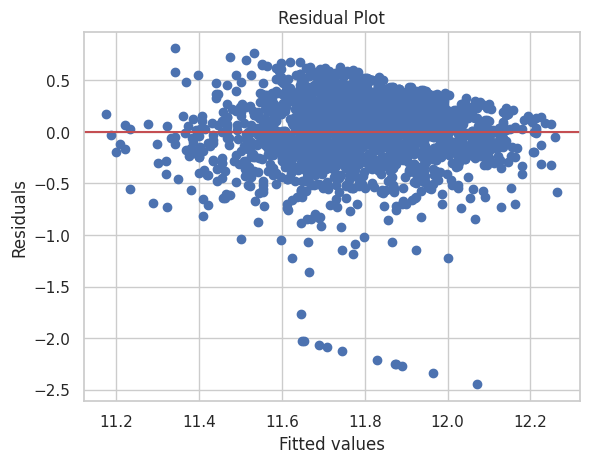

In [ ]:
residuals = reg.resid
plt.scatter(reg.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

### Step 6: Create a heatmap to assess multicollinearity

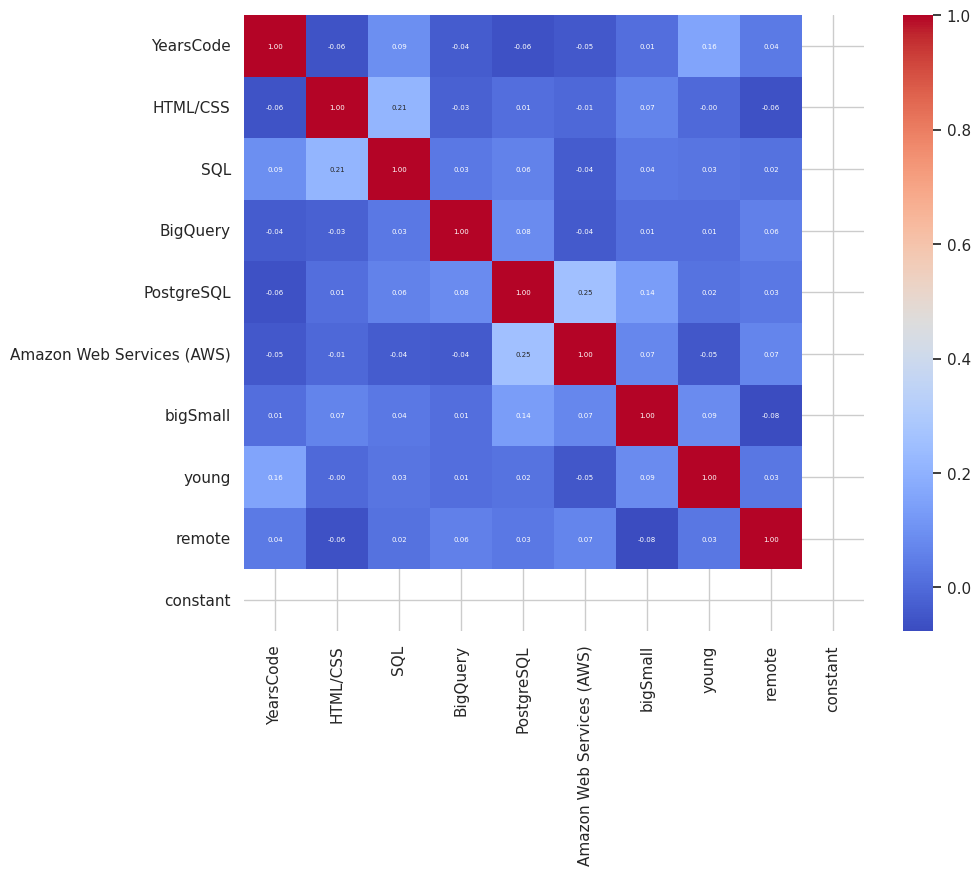

In [ ]:
corr_matrix = finalReg.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            annot_kws={"size": 5})
plt.show()